In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import rc
from matplotlib import font_manager
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from gensim.models import Word2Vec
import optuna
from optuna.samplers import TPESampler
path='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc("font",family=font_name)

IT과학,0
경제,1
사회,2
생활문화,3
세계,4
스포츠,5
정치,6

In [2]:
econimics1=pd.read_csv('1월_경제.csv')
it1=pd.read_csv('1월_IT.csv')
culture1=pd.read_csv('1월_문화.csv')
society1=pd.read_csv('1월_사회.csv')
sports1=pd.read_csv('1월_스포츠.csv')
politics1=pd.read_csv('1월_정치.csv')

In [3]:
econimics2=pd.read_csv('2월_경제.csv')
it2=pd.read_csv('2월_IT.csv')
culture2=pd.read_csv('2월_문화.csv')
society2=pd.read_csv('2월_사회.csv')
sports2=pd.read_csv('2월_스포츠.csv')
politics2=pd.read_csv('2월_정치.csv')
econimics3=pd.read_csv('3월_경제.csv')
it3=pd.read_csv('3월_IT.csv')
culture3=pd.read_csv('3월_문화.csv')
society3=pd.read_csv('3월_사회.csv')
sports3=pd.read_csv('3월_스포츠.csv')
politics3=pd.read_csv('3월_정치.csv')
econimics4=pd.read_csv('4월_경제.csv')
it4=pd.read_csv('4월_IT.csv')
culture4=pd.read_csv('4월_문화.csv')
society4=pd.read_csv('4월_사회.csv')
sports4=pd.read_csv('4월_스포츠.csv')
politics4=pd.read_csv('4월_정치.csv')
econimics5=pd.read_csv('5월_경제.csv')
it5=pd.read_csv('5월_IT.csv')
culture5=pd.read_csv('5월_문화.csv')
society5=pd.read_csv('5월_사회.csv')
sports5=pd.read_csv('5월_스포츠.csv')
politics5=pd.read_csv('5월_정치.csv')
econimics6=pd.read_csv('6월_경제.csv')
it6=pd.read_csv('6월_IT.csv')
culture6=pd.read_csv('6월_문화.csv')
society6=pd.read_csv('6월_사회.csv')
sports6=pd.read_csv('6월_스포츠.csv')
politics6=pd.read_csv('6월_정치.csv')

In [4]:
econimics=pd.concat([econimics1,econimics2,econimics3,econimics4,econimics5,econimics6],axis=0)
it=pd.concat([it1,it2,it3,it4,it5,it6],axis=0)
society=pd.concat([society1,society2,society3,society4,society5,society6],axis=0)
culture=pd.concat([culture1,culture2,culture3,culture4,culture5,culture6],axis=0)
sports=pd.concat([sports1,sports2,sports3,sports4,sports5,sports6],axis=0)
politics=pd.concat([politics1,politics2,politics3,politics4,politics5,politics6],axis=0)

In [5]:
econimics['topic_idx']=1
it['topic_idx']=0
society['topic_idx']=2
culture['topic_idx']=3
sports['topic_idx']=4
politics['topic_idx']=5

In [6]:
econimics['topic']='경제'
it['topic']='IT'
society['topic']='사회'
culture['topic']='문화'
sports['topic']='스포츠'
politics['topic']='정치'

In [7]:
data=pd.concat([econimics,it,society,culture,sports,politics],axis=0)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
data.head()

,title,topic_idx,topic
0,"""1년차 연봉 5000만원, 만족도 100%"" 40대 환경미화원 후기",1,경제
1,"울산시, 특별교부세 437억 원 확보..역대 최대",1,경제
2,"""올해 울산에 6천 8백여 가구 분양 예상""",1,경제
3,울산 주택 매매가 상승률 둔화..16개월 내 최저,1,경제
4,2020년 울산 기업체 성장·수익·안전성 악화,1,경제


In [11]:
data.tail(10)

,title,topic_idx,topic
1212933,尹 대통령도 이준석 '손절' 나섰나..고립된 집권여당 대표,5,정치
1212934,납품단가 연동제 도입위해 업계 상황 듣는 박홍근 野 원내대표,5,정치
1212935,'납품단가 연동제 도입 촉구',5,정치
1212936,"'트로트 샛별' 김다현, 사천시장 당선인 만나 축하",5,정치
1212937,업계 상황 설명하는 유병조 한국창호커튼월협회장,5,정치
1212938,대화하는 이도훈 외교부 2차관과 방기선 기재부 1차관,5,정치
1212939,"민주 ""한동훈 '총장 패싱' 검찰 인사 벌써 3번째..누가 되든 '식물총장' 될 것""",5,정치
1212940,"민주 ""한동훈 검찰 인사는 막무가내..누가 되든 '식물총장'""",5,정치
1212941,"장경태 ""민형배 복당, 이번 비대위서 처리해야""",5,정치
1212942,"軍 ""북한 황강댐 수문 개방"".. 임진강 수위는 정상 관리 중",5,정치


## EDA

In [12]:
#전처리
def clean_text(sent):
    #sent_clean=re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s0-9A-Za-z]", " ", sent).strip()
    sent_clean=re.sub("\[[가-힣ㄱ-ㅎㅏ-ㅣ0-9A-Za-z\s+]+\]+","",sent)
    sent_clean=re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s0-9A-Za-z]","",sent_clean).strip()
    sent_clean=re.sub("\s{2,}"," ",sent_clean)
    return sent_clean

In [13]:
data["cleaned_title"] = data["title"].apply(lambda x : clean_text(x))
#test["cleaned_title"]  = test["title"].apply(lambda x : clean_text(x))

In [14]:
data.tail()

,title,topic_idx,topic,cleaned_title
1212938,대화하는 이도훈 외교부 2차관과 방기선 기재부 1차관,5,정치,대화하는 이도훈 외교부 2차관과 방기선 기재부 1차관
1212939,"민주 ""한동훈 '총장 패싱' 검찰 인사 벌써 3번째..누가 되든 '식물총장' 될 것""",5,정치,민주 한동훈 총장 패싱 검찰 인사 벌써 3번째누가 되든 식물총장 될 것
1212940,"민주 ""한동훈 검찰 인사는 막무가내..누가 되든 '식물총장'""",5,정치,민주 한동훈 검찰 인사는 막무가내누가 되든 식물총장
1212941,"장경태 ""민형배 복당, 이번 비대위서 처리해야""",5,정치,장경태 민형배 복당 이번 비대위서 처리해야
1212942,"軍 ""북한 황강댐 수문 개방"".. 임진강 수위는 정상 관리 중",5,정치,북한 황강댐 수문 개방 임진강 수위는 정상 관리 중


In [15]:
data_text = data["cleaned_title"].tolist()
#test_text = test["cleaned_title"].tolist()

In [16]:
len(data_text)

1212943

In [17]:
okt=Okt()

In [18]:
data_text[:5]

['1년차 연봉 5000만원 만족도 100 40대 환경미화원 후기',
 '울산시 특별교부세 437억 원 확보역대 최대',
 '올해 울산에 6천 8백여 가구 분양 예상',
 '울산 주택 매매가 상승률 둔화16개월 내 최저',
 '2020년 울산 기업체 성장수익안전성 악화']

In [20]:
for i in data_text[:5]: #명사 추출
    print(okt.nouns(i))

['연봉', '만족도', '환경미화원', '후기']
['산시', '특별', '교부', '세', '원', '확보', '역대', '최대']
['올해', '울산', '가구', '분양', '예상']
['울산', '주택', '매매', '상', '승률', '둔화', '개월', '내', '최저']
['울산', '기업체', '성장', '수익', '안전성', '악화']


In [33]:
#문장 단어 분포도
vocab={}
for sent in data_text:
    for word in okt.nouns(sent):
        if word not in vocab.keys():
            vocab[word]=len(vocab)

In [34]:
print(len(vocab))

79945


In [36]:
text_len=[len(okt.morphs(s)) for s in data_text]
print('가장 적은 단어 수 : {}'.format(np.min(text_len)))
print('가장 많은 단어 수 : {}'.format(np.max(text_len)))
print('평균 문장 단어 : {}'.format(np.mean(text_len)))

가장 적은 단어 수 : 0
가장 많은 단어 수 : 59
평균 문장 단어 : 9.698219124888803


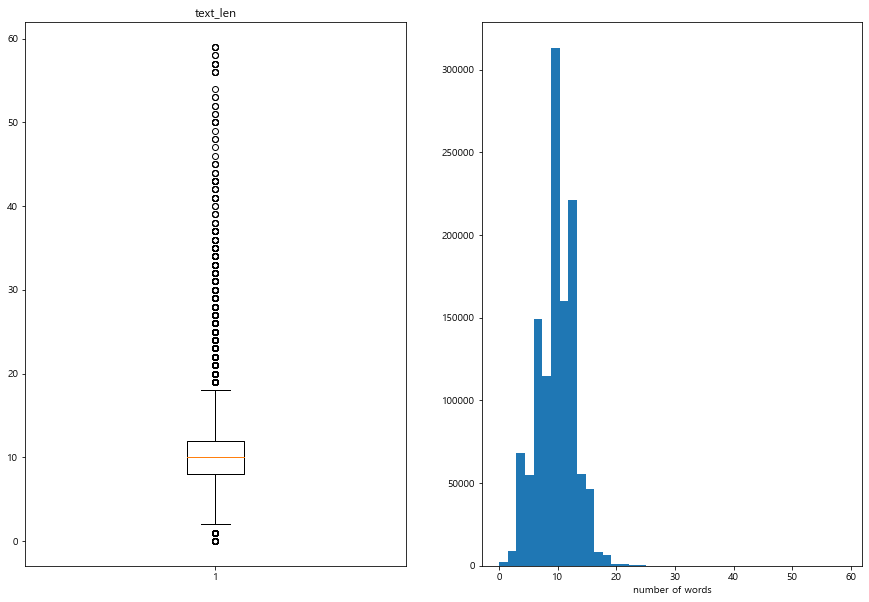

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text_len')
#text 길이는 중위수가 10, 평균이 8에 가깝다.
plt.subplot(1,2,2)
plt.hist(text_len,bins=40)
plt.xlabel('number of words')
plt.show()
#단어의 수는 10에서 많은 편이다.

In [38]:
#문장길이
str_len=[len(s) for s in data_text]
print('가장 적은 문장 : {}'.format(np.min(str_len)))
print('가장 긴 문장  : {}'.format(np.max(str_len)))
print('평균 문장 문장 : {}'.format(np.mean(str_len)))

가장 적은 문장 : 0
가장 긴 문장  : 157
평균 문장 문장 : 25.635397541351903


## 분야마다 많이 사용한 단어 분포

In [21]:
def plot_wordcloud(text):#워드클라우딩(명사 추출)
    def preprocess_text(text):
        corpus=[]
        for a in text:
            tokens = [word for word in okt.nouns(a) if len(word)>1]
            corpus.extend(tokens)
        return corpus
    corpus=preprocess_text(text)
    count = Counter(corpus)
    words = dict(count.most_common())
    wordcloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_words=100,
    max_font_size=50, 
    scale=7,
    random_state=1)
    wordcloud = wordcloud.generate_from_frequencies(words)
    return wordcloud

IT,0 경제,1 사회,2 생활문화,3 스포츠,4 정치,5

KeyboardInterrupt: 

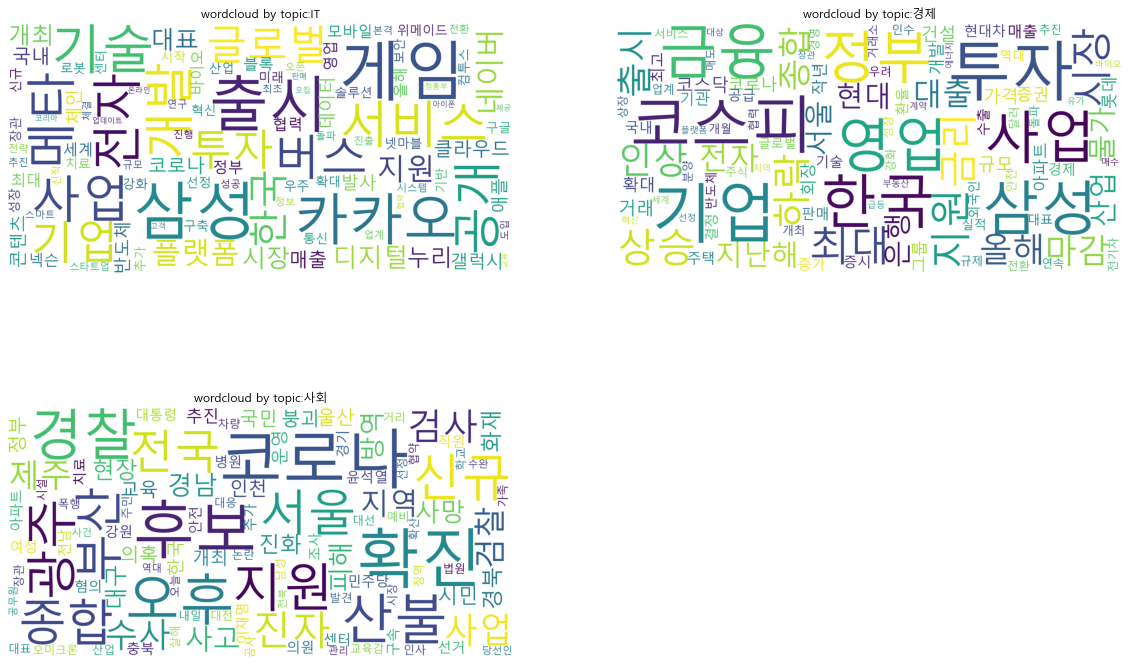

In [40]:
fig=plt.figure(figsize=(20,20))
rows=3
cols=2
topic=['IT','경제','사회','문화','스포츠','정치']
for i in range(6):
    wordcloud=plot_wordcloud(data[data['topic_idx']==i]['cleaned_title'])
    ax=fig.add_subplot(rows,cols,i+1)
    ax.axis('off')
    ax.set_title('wordcloud by topic:{}'.format(topic[i]))
    ax.imshow(wordcloud)

In [22]:
def plot_wordcloud_words(text):#워드클라우딩(단어 추출, 불용어 제거)
    def preprocess_text(text):
        corpus=[]
        for a in text:
            tokens = [word[0] for word in okt.pos(a) if word[1] in ['Noun']]
            corpus.extend(tokens)
        return corpus
    corpus=preprocess_text(text)
    count = Counter(corpus)
    words = dict(count.most_common())
    wordcloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_words=100,
    max_font_size=50, 
    scale=7,
    random_state=1)
    wordcloud = wordcloud.generate_from_frequencies(words)
    return wordcloud

In [ ]:
fig=plt.figure(figsize=(10,10))
rows=3
cols=2
# topic=['IT과학','경제','사회','생활문화','세계','스포츠','정치']
for i in range(6):
    wordcloud=plot_wordcloud_words(train[data['topic_idx']==i]['cleaned_title'])
    ax=fig.add_subplot(rows,cols,i+1)
    ax.axis('off')
    ax.set_title('wordcloud by topic:{}'.format(format(topic[i])))
    ax.imshow(wordcloud)

In [ ]:
fig=plt.figure(figsize=(17,20)) #전처리 한 상태에서 제일 많이 나온 단어
rows=2
cols=3
#topic=['IT과학','경제','사회','생활문화','세계','스포츠','정치']
def plot_top_non_stopwords_barchart(text):
    corpus=[]
    for i in text:
        for word in okt.pos(i):
            if word[1] in ['Noun'] and len(word[0])>1:
                corpus.append(word[0])
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
        x.append(word)
        y.append(count)
    return x, y
for i in range(6):
    x,y = plot_top_non_stopwords_barchart(train[train['topic_idx']==i]['cleaned_title'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title('wordcloud by topic:{}'.format(topic[i]))
    sns.barplot(x=y,y=x)

In [23]:
stopwords=[]
for i in data_text:
    for word in okt.pos(i):
        if word[0] not in stopwords:
            if word[1] in ['Josa','Determiner','Eomi','Exclamation','KoreanParticle','Suffix']:
                stopwords.append(word[0])
        else:
            pass

In [24]:
stopwords=list(set(stopwords))

## 모델 설계(딥러닝-TfidfVectorizer, 불용어제거)

In [48]:
train_label = np.asarray(data.topic_idx)
x_train,x_test,y_train,y_test=train_test_split(data_text, train_label, test_size = 0.3, random_state = 1)
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)

In [49]:
y_train

array([4, 5, 4, ..., 2, 2, 1], dtype=int64)

In [55]:
tfidf = TfidfVectorizer(analyzer='word', sublinear_tf=True,max_features=500000, ngram_range=(1, 2), binary=False,
                       stop_words=stopwords)
tfidf.fit(data_text)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2),
                stop_words=['요', '도', '네만', '만이라도', '에구구', '까지야', '말고는', '로운',
                            '에만', '조', '틱', 'ㄴ', '악', '이니까', 'ㅡ', 'ㅇㄱㄹㅇ', '분',
                            '플', '어휴', '에크', '라는', '난', '으로의', '아이구', '만큼이나',
                            '에를', '마다', 'ㅇㅇ', '와는', '하악', ...],
                sublinear_tf=True)

In [56]:
train_tf_text = tfidf.transform(x_train).astype('float32')
#max_feature 안 쓸 경우: 849060x4923099 sparse matrix of type '<class 'numpy.float32'>' with 9504629 stored elements in Compressed Sparse Row format
#단어벡터의 열이 4923099이므로 500000으로 축소
test_tf_text = tfidf.transform(x_test).astype('float32')

In [57]:
train_tf_text

<849060x500000 sparse matrix of type '<class 'numpy.float32'>'
	with 6096887 stored elements in Compressed Sparse Row format>

## 2층 쌓을 때

In [58]:
model=Sequential()
model.add(Dense(128,input_dim=500000,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               64000128  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 64,000,902
Trainable params: 64,000,902
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [61]:
history = model.fit(x =train_tf_text, y = y_train,batch_size=1000,
                    validation_data =(test_tf_text,y_test),
                    epochs = 10)

Epoch 1/10
850/850 [==============================] - 525s 617ms/step - loss: 1.0404 - accuracy: 0.6598 - val_loss: 0.6726 - val_accuracy: 0.7772
Epoch 2/10
850/850 [==============================] - 524s 615ms/step - loss: 0.6618 - accuracy: 0.7865 - val_loss: 0.6072 - val_accuracy: 0.7920
Epoch 3/10
850/850 [==============================] - 532s 625ms/step - loss: 0.5619 - accuracy: 0.8172 - val_loss: 0.5938 - val_accuracy: 0.7955
Epoch 4/10
850/850 [==============================] - 523s 614ms/step - loss: 0.5011 - accuracy: 0.8355 - val_loss: 0.5958 - val_accuracy: 0.7961
Epoch 5/10
850/850 [==============================] - 522s 613ms/step - loss: 0.4577 - accuracy: 0.8485 - val_loss: 0.6058 - val_accuracy: 0.7961
Epoch 6/10
850/850 [==============================] - 522s 613ms/step - loss: 0.4225 - accuracy: 0.8585 - val_loss: 0.6182 - val_accuracy: 0.7954
Epoch 7/10
850/850 [==============================] - 524s 615ms/step - loss: 0.3950 - accuracy: 0.8669 - val_loss: 0.6330 -

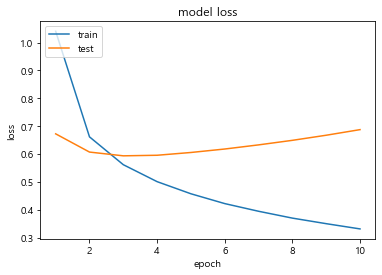

In [62]:
epochs = range(1, len(history.history['accuracy']) + 1) #Dense,Dropout사용
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

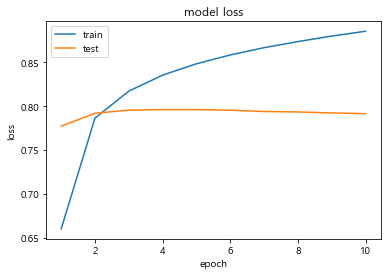

In [63]:
epochs = range(1, len(history.history['accuracy']) + 1) #Dense,Dropout사용
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
tmp_pred=model.predict(test_tf_text)

11372/11372 [==============================] - 12s 883us/step


In [66]:
np.mean(np.argmax(tmp_pred,axis=1)==y_test)

0.7914576938191672

In [67]:
print(np.argmax(tmp_pred,axis=1))

[2 4 4 ... 2 1 4]


In [68]:
print(y_test)

[2 4 2 ... 2 1 4]


In [71]:
y_test

array([2, 4, 2, ..., 2, 1, 4], dtype=int64)

In [78]:
np.argmax(tmp_pred,axis=1)==y_test

array([ True,  True, False, ...,  True,  True,  True])

In [79]:
tmp_pred

array([[5.4763060e-02, 5.1164132e-02, 5.2312320e-01, 3.6658061e-01,
        1.1070110e-03, 3.2619317e-03],
       [8.5326174e-04, 2.4629461e-03, 3.1737936e-01, 8.7012397e-03,
        6.6362578e-01, 6.9774883e-03],
       [4.4873391e-06, 6.7362584e-05, 2.3414752e-01, 3.4727907e-04,
        7.6491553e-01, 5.1786815e-04],
       ...,
       [1.4500291e-05, 1.5098329e-03, 9.9739635e-01, 1.0198178e-03,
        4.2386989e-07, 5.9042286e-05],
       [1.8425037e-01, 8.0256748e-01, 1.0907699e-03, 1.1991464e-02,
        1.6778409e-05, 8.3237610e-05],
       [1.0797510e-06, 4.5381614e-05, 5.2327006e-05, 5.5094797e-06,
        9.9989402e-01, 1.6232278e-06]], dtype=float32)

In [91]:
dl2=pd.DataFrame({'text':x_test,'y_test':y_test,'pred':np.argmax(tmp_pred,axis=1)})

In [94]:
dl2.shape

(363883, 3)

In [106]:
dl2_correct=dl2[dl2.pred==dl2.y_test] #pred와 test가 일치하는 부분

In [104]:
x_test #IT과학,0 경제,1 사회,2 생활문화,3 스포츠,4 정치,5

['신규확진 10만 2211명 이틀연속 10만명대',
 '고예림물 뿌리는 세레모니 ',
 '박은신 드라이브샷',
 '코웨이 우리집 화장실 업그레이드 프로모션 실시',
 '당정대 경제위기 심각민간 주도로 정책 전환',
 '간병인 PCR 우선순위 제외보호자 면회도 어려워',
 '김인철 외대총장 시절 친일 설립자 동상 설치 강행',
 '삶은 달걀과 귤의 조합 몸의 변화가',
 '원전 보호울진 산불지역에 산불확산차단제 긴급 투하',
 ' 내 난소 나이는 몇 살 증가하는 난임 환자',
 '카카오모빌리티 반려동물 이동 위한 카카오T 펫 베타서비스 출시',
 '코로나 오후 9시까지 6만2471명 확진어제보다 1만1576명',
 ' 김보름 이 악물고',
 '아쉽게 결승 진출 실패하는 박지우 ',
 ' 몸에 맞는 볼로 출루하는 김도영',
 '승리 거둔 한화 3연패 탈출 ',
 '제르소샌드위치 ',
 '한국가스공사1위 KT 잡고 연패탈출 ',
 '코로나 장기화로 부부갈등 폭발작년 이혼 상담건수 9 늘었다',
 '군포시 소상공인 경영상담 전문가 자문위원단 위촉',
 '강원 청년신혼부부 임대주택 23가구 공급',
 '다음 주 북서울자이폴라리스 등 7815가구 분양',
 '박찬욱탕웨이박해일 헤어질 결심 칸 진출 소감 누구보다 오래',
 '사울 나상호 위험해',
 '문 대통령 도산 안창호 막내아들 안필영 선생 별세 애도',
 '김정숙 여사 서 아이들과 운동회',
 'SK매직 에코미니 정수기 그린41 일시불 상품 출시',
 '질주하는 이승훈',
 'LG전자 식물생활가전 틔운 제주도에서 체험해보세요',
 ' 판정으로 바뀐 결과3위 중국은 결승 진출 2위 미국은 페널티',
 '명단에 없어요 방치에 119 눌렀다셀프치료 첫날 대혼란',
 '50대 기업 평균 연봉 9400만 원 1억200만 원 7300만 원',
 ' 안철수 국가 통합 사이버안보체계 확립해야',
 '몽클레르 5 몽클레르 크레이그 그린 컬렉션 론칭',
 '배정대 타점에 득점까지',
 '대형 개발사 넥슨게임즈 출범글로벌 정조준',


In [ ]:
fig=plt.figure(figsize=(10,10))
rows=3
cols=2
topic=['IT과학','경제','사회','생활문화','세계','스포츠','정치']
for i in range(6):
    wordcloud=plot_wordcloud_words(dl2_correct[dl2_correct['y_test']==i]['text'])
    ax=fig.add_subplot(rows,cols,i+1)
    ax.axis('off')
    ax.set_title('wordcloud by topic:{}'.format(topic[i]))
    ax.imshow(wordcloud)

## 3층

In [95]:
threemodel=Sequential()
threemodel.add(Dense(128,input_dim=500000,activation='relu'))
threemodel.add(Dropout(0.8))
threemodel.add(Dense(64,activation='relu'))
threemodel.add(Dropout(0.8))
threemodel.add(Dense(6,activation='softmax'))
threemodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               64000128  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 64,008,774
Trainable params: 64,008,774
Non-trainable params: 0
_________________________________________________________________


In [ ]:
threemodel.add(Dense(6, activation='softmax'))
threemodel.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history3 = threemodel.fit(train_tf_text, y_train, epochs=30, callbacks=[es, mc], batch_size=64,validation_data=(test_tf_text, y_test))

In [ ]:
epochs = range(1, len(history3.history['accuracy']) + 1) #Dense,Dropout사용
plt.plot(epochs, history3.history['loss'])
plt.plot(epochs, history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
epochs = range(1, len(history3.history['accuracy']) + 1) #Dense,Dropout사용
plt.plot(epochs, history3.history['accuracy'])
plt.plot(epochs, history3.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4층

In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=150000,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(6,activation='softmax'))
model.summary()

## 머신러닝

In [25]:
def split(text):
    tokens=okt.morphs(text)
    return tokens

In [26]:
data.head()

,title,topic_idx,topic,cleaned_title
0,"""1년차 연봉 5000만원, 만족도 100%"" 40대 환경미화원 후기",1,경제,1년차 연봉 5000만원 만족도 100 40대 환경미화원 후기
1,"울산시, 특별교부세 437억 원 확보..역대 최대",1,경제,울산시 특별교부세 437억 원 확보역대 최대
2,"""올해 울산에 6천 8백여 가구 분양 예상""",1,경제,올해 울산에 6천 8백여 가구 분양 예상
3,울산 주택 매매가 상승률 둔화..16개월 내 최저,1,경제,울산 주택 매매가 상승률 둔화16개월 내 최저
4,2020년 울산 기업체 성장·수익·안전성 악화,1,경제,2020년 울산 기업체 성장수익안전성 악화


In [30]:
# tfidf = TfidfVectorizer(analyzer='word', sublinear_tf=True,max_features=500000, ngram_range=(1, 2), binary=False,
#                        stop_words=stopwords)
tfidf_vect = TfidfVectorizer(tokenizer=split,stop_words=stopwords)
tfidf_vect.fit(data['cleaned_title'])
tfidf_matrix_data = tfidf_vect.transform(data['cleaned_title'])

In [31]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_matrix_data,data['topic_idx'],test_size=0.3,
                                              random_state=42)

In [32]:
def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "dart",
        "num_class": 6,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        'max_depth': trial.suggest_int('max_depth', 1, 10, step=1, log=False), 
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.1, log=True), 
        'n_estimators': trial.suggest_int('n_estimators', 8, 1024, step=1, log=True), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)
    }
    gbm = LGBMClassifier(**param)
    gbm.fit(X_train, y_train)
    preds = gbm.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

In [33]:
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2022-12-27 20:27:23,075] A new study created in memory with name: lightgbm
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=0.8257583543209884 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05
[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 20:41:12,154] Trial 0 finished with value: 0.2741018404267306 and parameters: {'lambda_l1': 5.6649755830282306e-05, 'lambda_l2': 0.030403280126677572, 'num_leaves': 2, 'feature_fraction': 0.5813995435791038, 'bagging_fraction': 0.48805353449026784, 'bagging_freq': 1, 'min_child_samples': 22, 'max_depth': 4, 'learning_rate': 0.0015498955191377143, 'n_estimators': 106, 'colsample_bytree': 0.8257583543209884}. Best is trial 0 with value: 0.2741018404267306.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.4164325559187557, colsample_bytree=0.9904784727158192 will be ignored. Current value: feature_fraction=0.4164325559187557
[LightGBM] [Warning] lambda_l1 is set=0.01468843425028415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01468843425028415
[LightGBM] [Warning] bagging_fraction is set=0.8022805061070413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8022805061070413
[LightGBM] [Warning] lambda_l2 is set=6.919428843480712e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.919428843480712e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-27 21:06:07,952] Trial 1 finished with value: 0.32617352280815537 and parameters: {'lambda_l1': 0.01468843425028415, 'lambda_l2': 6.919428843480712e-07, 'num_leaves': 225, 'feature_fraction': 0.4164325559187557, 'bagging_fraction': 0.8022805061070413, 'bagging_freq': 3, 'min_child_samples': 58, 'max_depth': 2, 'learning_rate': 0.00039292030026239497, 'n_estimators': 385, 'colsample_bytree': 0.9904784727158192}. Best is trial 1 with value: 0.32617352280815537.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9367639981023084, colsample_bytree=0.9873668590451505 will be ignored. Current value: feature_fraction=0.9367639981023084
[LightGBM] [Warning] lambda_l1 is set=6.6193844201488494e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.6193844201488494e-06
[LightGBM] [Warning] bagging_fraction is set=0.4510265268218668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4510265268218668
[LightGBM] [Warning] lambda_l2 is set=0.017017804924595526, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017017804924595526
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 21:13:09,732] Trial 2 finished with value: 0.2507564244551133 and parameters: {'lambda_l1': 6.6193844201488494e-06, 'lambda_l2': 0.017017804924595526, 'num_leaves': 225, 'feature_fraction': 0.9367639981023084, 'bagging_fraction': 0.4510265268218668, 'bagging_freq': 1, 'min_child_samples': 21, 'max_depth': 9, 'learning_rate': 0.0001972606689184097, 'n_estimators': 59, 'colsample_bytree': 0.9873668590451505}. Best is trial 1 with value: 0.32617352280815537.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8119005566089502, colsample_bytree=0.9367837985354466 will be ignored. Current value: feature_fraction=0.8119005566089502
[LightGBM] [Warning] lambda_l1 is set=0.0006287638503361937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006287638503361937
[LightGBM] [Warning] bagging_fraction is set=0.9007754031384237, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9007754031384237
[LightGBM] [Warning] lambda_l2 is set=0.016861415310578325, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016861415310578325
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 21:14:12,983] Trial 3 finished with value: 0.4527938925423831 and parameters: {'lambda_l1': 0.0006287638503361937, 'lambda_l2': 0.016861415310578325, 'num_leaves': 82, 'feature_fraction': 0.8119005566089502, 'bagging_fraction': 0.9007754031384237, 'bagging_freq': 1, 'min_child_samples': 77, 'max_depth': 10, 'learning_rate': 0.017558886158773757, 'n_estimators': 30, 'colsample_bytree': 0.9367837985354466}. Best is trial 3 with value: 0.4527938925423831.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5761684890242077, colsample_bytree=0.8474719477841015 will be ignored. Current value: feature_fraction=0.5761684890242077
[LightGBM] [Warning] lambda_l1 is set=8.492470739500463e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.492470739500463e-08
[LightGBM] [Warning] bagging_fraction is set=0.5726652031518092, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5726652031518092
[LightGBM] [Warning] lambda_l2 is set=0.00010740926273949015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010740926273949015
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 21:32:15,558] Trial 4 finished with value: 0.2124776370426758 and parameters: {'lambda_l1': 8.492470739500463e-08, 'lambda_l2': 0.00010740926273949015, 'num_leaves': 233, 'feature_fraction': 0.5761684890242077, 'bagging_fraction': 0.5726652031518092, 'bagging_freq': 1, 'min_child_samples': 6, 'max_depth': 7, 'learning_rate': 0.00043140417921356194, 'n_estimators': 28, 'colsample_bytree': 0.8474719477841015}. Best is trial 3 with value: 0.4527938925423831.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7535833221419705, colsample_bytree=0.8607689217746535 will be ignored. Current value: feature_fraction=0.7535833221419705
[LightGBM] [Warning] lambda_l1 is set=3.021780442592028e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.021780442592028e-08
[LightGBM] [Warning] bagging_fraction is set=0.8198550160125587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8198550160125587
[LightGBM] [Warning] lambda_l2 is set=0.0014691239860705116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014691239860705116
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 21:33:14,138] Trial 5 finished with value: 0.24585924596642328 and parameters: {'lambda_l1': 3.021780442592028e-08, 'lambda_l2': 0.0014691239860705116, 'num_leaves': 39, 'feature_fraction': 0.7535833221419705, 'bagging_fraction': 0.8198550160125587, 'bagging_freq': 1, 'min_child_samples': 44, 'max_depth': 7, 'learning_rate': 0.0017479854309911975, 'n_estimators': 10, 'colsample_bytree': 0.8607689217746535}. Best is trial 3 with value: 0.4527938925423831.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7519330243011957, colsample_bytree=0.9782525741188102 will be ignored. Current value: feature_fraction=0.7519330243011957
[LightGBM] [Warning] lambda_l1 is set=0.009422188901528314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009422188901528314
[LightGBM] [Warning] bagging_fraction is set=0.9420411491727301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9420411491727301
[LightGBM] [Warning] lambda_l2 is set=0.00043052860159544285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00043052860159544285
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-27 21:35:36,125] Trial 6 finished with value: 0.2763855415064732 and parameters: {'lambda_l1': 0.009422188901528314, 'lambda_l2': 0.00043052860159544285, 'num_leaves': 242, 'feature_fraction': 0.7519330243011957, 'bagging_fraction': 0.9420411491727301, 'bagging_freq': 1, 'min_child_samples': 18, 'max_depth': 9, 'learning_rate': 0.0015596620715924295, 'n_estimators': 17, 'colsample_bytree': 0.9782525741188102}. Best is trial 3 with value: 0.4527938925423831.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9299836547234859, colsample_bytree=0.9894520141445157 will be ignored. Current value: feature_fraction=0.9299836547234859
[LightGBM] [Warning] lambda_l1 is set=1.3486297561351885e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3486297561351885e-05
[LightGBM] [Warning] bagging_fraction is set=0.7742033242333654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7742033242333654
[LightGBM] [Warning] lambda_l2 is set=0.05718852932029385, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05718852932029385
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-12-27 21:37:59,866] Trial 7 finished with value: 0.4538876507009121 and parameters: {'lambda_l1': 1.3486297561351885e-05, 'lambda_l2': 0.05718852932029385, 'num_leaves': 187, 'feature_fraction': 0.9299836547234859, 'bagging_fraction': 0.7742033242333654, 'bagging_freq': 6, 'min_child_samples': 38, 'max_depth': 3, 'learning_rate': 0.04871454545414109, 'n_estimators': 62, 'colsample_bytree': 0.9894520141445157}. Best is trial 7 with value: 0.4538876507009121.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9696935552242427, colsample_bytree=0.7008610981093476 will be ignored. Current value: feature_fraction=0.9696935552242427
[LightGBM] [Warning] lambda_l1 is set=0.009353485565470611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009353485565470611
[LightGBM] [Warning] bagging_fraction is set=0.6699472800879643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6699472800879643
[LightGBM] [Warning] lambda_l2 is set=0.003937870971174469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003937870971174469
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-27 21:41:33,571] Trial 8 finished with value: 0.4820642898953785 and parameters: {'lambda_l1': 0.009353485565470611, 'lambda_l2': 0.003937870971174469, 'num_leaves': 31, 'feature_fraction': 0.9696935552242427, 'bagging_fraction': 0.6699472800879643, 'bagging_freq': 5, 'min_child_samples': 44, 'max_depth': 3, 'learning_rate': 0.05130250385596956, 'n_estimators': 126, 'colsample_bytree': 0.7008610981093476}. Best is trial 8 with value: 0.4820642898953785.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9315652595864647, colsample_bytree=0.9991968551354442 will be ignored. Current value: feature_fraction=0.9315652595864647
[LightGBM] [Warning] lambda_l1 is set=0.0035834737096036534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035834737096036534
[LightGBM] [Warning] bagging_fraction is set=0.6143618560014998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6143618560014998
[LightGBM] [Warning] lambda_l2 is set=8.70570839382862e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.70570839382862e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-12-27 21:44:51,106] Trial 9 finished with value: 0.4300090963304139 and parameters: {'lambda_l1': 0.0035834737096036534, 'lambda_l2': 8.70570839382862e-06, 'num_leaves': 136, 'feature_fraction': 0.9315652595864647, 'bagging_fraction': 0.6143618560014998, 'bagging_freq': 7, 'min_child_samples': 64, 'max_depth': 1, 'learning_rate': 0.06142026716955348, 'n_estimators': 224, 'colsample_bytree': 0.9991968551354442}. Best is trial 8 with value: 0.4820642898953785.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.992593709070849, colsample_bytree=0.7058178769973622 will be ignored. Current value: feature_fraction=0.992593709070849
[LightGBM] [Warning] lambda_l1 is set=7.721753827343493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.721753827343493
[LightGBM] [Warning] bagging_fraction is set=0.6755384737821297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6755384737821297
[LightGBM] [Warning] lambda_l2 is set=4.039397504172109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.039397504172109
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-27 22:48:54,341] Trial 10 finished with value: 0.5219122630076151 and parameters: {'lambda_l1': 7.721753827343493, 'lambda_l2': 4.039397504172109, 'num_leaves': 101, 'feature_fraction': 0.992593709070849, 'bagging_fraction': 0.6755384737821297, 'bagging_freq': 5, 'min_child_samples': 79, 'max_depth': 5, 'learning_rate': 0.009773114544570704, 'n_estimators': 933, 'colsample_bytree': 0.7058178769973622}. Best is trial 10 with value: 0.5219122630076151.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8551068786194246, colsample_bytree=0.7041073244581906 will be ignored. Current value: feature_fraction=0.8551068786194246
[LightGBM] [Warning] lambda_l1 is set=4.780260623410405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.780260623410405
[LightGBM] [Warning] bagging_fraction is set=0.6653286624732987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6653286624732987
[LightGBM] [Warning] lambda_l2 is set=5.84765526896857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.84765526896857
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-27 23:59:37,362] Trial 11 finished with value: 0.5209476672446913 and parameters: {'lambda_l1': 4.780260623410405, 'lambda_l2': 5.84765526896857, 'num_leaves': 97, 'feature_fraction': 0.8551068786194246, 'bagging_fraction': 0.6653286624732987, 'bagging_freq': 5, 'min_child_samples': 100, 'max_depth': 5, 'learning_rate': 0.010013686694706914, 'n_estimators': 894, 'colsample_bytree': 0.7041073244581906}. Best is trial 10 with value: 0.5219122630076151.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.843880014306968, colsample_bytree=0.707925363312996 will be ignored. Current value: feature_fraction=0.843880014306968
[LightGBM] [Warning] lambda_l1 is set=7.818673267588219, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.818673267588219
[LightGBM] [Warning] bagging_fraction is set=0.7031408949906939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7031408949906939
[LightGBM] [Warning] lambda_l2 is set=5.237153987893642, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.237153987893642
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 01:02:32,071] Trial 12 finished with value: 0.5097050425548871 and parameters: {'lambda_l1': 7.818673267588219, 'lambda_l2': 5.237153987893642, 'num_leaves': 128, 'feature_fraction': 0.843880014306968, 'bagging_fraction': 0.7031408949906939, 'bagging_freq': 4, 'min_child_samples': 100, 'max_depth': 5, 'learning_rate': 0.008003312589881965, 'n_estimators': 1008, 'colsample_bytree': 0.707925363312996}. Best is trial 10 with value: 0.5219122630076151.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8411032083286797, colsample_bytree=0.7652930373641221 will be ignored. Current value: feature_fraction=0.8411032083286797
[LightGBM] [Warning] lambda_l1 is set=6.618320452569746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.618320452569746
[LightGBM] [Warning] bagging_fraction is set=0.546010433979286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.546010433979286
[LightGBM] [Warning] lambda_l2 is set=6.669303787691026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.669303787691026
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 02:03:11,294] Trial 13 finished with value: 0.5231077022009822 and parameters: {'lambda_l1': 6.618320452569746, 'lambda_l2': 6.669303787691026, 'num_leaves': 104, 'feature_fraction': 0.8411032083286797, 'bagging_fraction': 0.546010433979286, 'bagging_freq': 4, 'min_child_samples': 100, 'max_depth': 6, 'learning_rate': 0.008611548076604037, 'n_estimators': 942, 'colsample_bytree': 0.7652930373641221}. Best is trial 13 with value: 0.5231077022009822.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6398609605012098, colsample_bytree=0.7638728581170074 will be ignored. Current value: feature_fraction=0.6398609605012098
[LightGBM] [Warning] lambda_l1 is set=0.3618325184731007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3618325184731007
[LightGBM] [Warning] bagging_fraction is set=0.5405080711144874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5405080711144874
[LightGBM] [Warning] lambda_l2 is set=0.3609081027823417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3609081027823417
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 02:30:13,248] Trial 14 finished with value: 0.4706073105915913 and parameters: {'lambda_l1': 0.3618325184731007, 'lambda_l2': 0.3609081027823417, 'num_leaves': 157, 'feature_fraction': 0.6398609605012098, 'bagging_fraction': 0.5405080711144874, 'bagging_freq': 3, 'min_child_samples': 81, 'max_depth': 7, 'learning_rate': 0.004193057745288164, 'n_estimators': 470, 'colsample_bytree': 0.7638728581170074}. Best is trial 13 with value: 0.5231077022009822.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9943326896158998, colsample_bytree=0.7569954144229429 will be ignored. Current value: feature_fraction=0.9943326896158998
[LightGBM] [Warning] lambda_l1 is set=0.39872734957789646, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.39872734957789646
[LightGBM] [Warning] bagging_fraction is set=0.5381998105596045, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5381998105596045
[LightGBM] [Warning] lambda_l2 is set=2.202671571805859e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.202671571805859e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 02:53:31,332] Trial 15 finished with value: 0.5474094695272931 and parameters: {'lambda_l1': 0.39872734957789646, 'lambda_l2': 2.202671571805859e-08, 'num_leaves': 84, 'feature_fraction': 0.9943326896158998, 'bagging_fraction': 0.5381998105596045, 'bagging_freq': 4, 'min_child_samples': 86, 'max_depth': 6, 'learning_rate': 0.020471113634140527, 'n_estimators': 448, 'colsample_bytree': 0.7569954144229429}. Best is trial 15 with value: 0.5474094695272931.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8808632373880857, colsample_bytree=0.7723041759149816 will be ignored. Current value: feature_fraction=0.8808632373880857
[LightGBM] [Warning] lambda_l1 is set=0.2497087817501705, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2497087817501705
[LightGBM] [Warning] bagging_fraction is set=0.42038928774595363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42038928774595363
[LightGBM] [Warning] lambda_l2 is set=6.942375867319202e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.942375867319202e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 03:16:28,263] Trial 16 finished with value: 0.5523753514179008 and parameters: {'lambda_l1': 0.2497087817501705, 'lambda_l2': 6.942375867319202e-08, 'num_leaves': 65, 'feature_fraction': 0.8808632373880857, 'bagging_fraction': 0.42038928774595363, 'bagging_freq': 3, 'min_child_samples': 89, 'max_depth': 6, 'learning_rate': 0.021495292504564494, 'n_estimators': 458, 'colsample_bytree': 0.7723041759149816}. Best is trial 16 with value: 0.5523753514179008.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9140898720316737, colsample_bytree=0.7820266378224839 will be ignored. Current value: feature_fraction=0.9140898720316737
[LightGBM] [Warning] lambda_l1 is set=0.21976190559660247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21976190559660247
[LightGBM] [Warning] bagging_fraction is set=0.4052082779615889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4052082779615889
[LightGBM] [Warning] lambda_l2 is set=1.4683574653433107e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4683574653433107e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 03:28:40,436] Trial 17 finished with value: 0.5300385013864346 and parameters: {'lambda_l1': 0.21976190559660247, 'lambda_l2': 1.4683574653433107e-08, 'num_leaves': 65, 'feature_fraction': 0.9140898720316737, 'bagging_fraction': 0.4052082779615889, 'bagging_freq': 3, 'min_child_samples': 88, 'max_depth': 8, 'learning_rate': 0.020586830616246672, 'n_estimators': 250, 'colsample_bytree': 0.7820266378224839}. Best is trial 16 with value: 0.5523753514179008.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9984007358790588, colsample_bytree=0.806071534637518 will be ignored. Current value: feature_fraction=0.9984007358790588
[LightGBM] [Warning] lambda_l1 is set=0.2759006658657359, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2759006658657359
[LightGBM] [Warning] bagging_fraction is set=0.4074392911694658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4074392911694658
[LightGBM] [Warning] lambda_l2 is set=1.0571137030755457e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0571137030755457e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 03:53:57,951] Trial 18 finished with value: 0.6585166111085157 and parameters: {'lambda_l1': 0.2759006658657359, 'lambda_l2': 1.0571137030755457e-08, 'num_leaves': 59, 'feature_fraction': 0.9984007358790588, 'bagging_fraction': 0.4074392911694658, 'bagging_freq': 2, 'min_child_samples': 63, 'max_depth': 6, 'learning_rate': 0.09251294636269482, 'n_estimators': 451, 'colsample_bytree': 0.806071534637518}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7044042032414632, colsample_bytree=0.8113827252030213 will be ignored. Current value: feature_fraction=0.7044042032414632
[LightGBM] [Warning] lambda_l1 is set=0.08143459234933159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08143459234933159
[LightGBM] [Warning] bagging_fraction is set=0.4000506500319285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4000506500319285
[LightGBM] [Warning] lambda_l2 is set=3.669359443973598e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.669359443973598e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:04:34,179] Trial 19 finished with value: 0.6265970105775758 and parameters: {'lambda_l1': 0.08143459234933159, 'lambda_l2': 3.669359443973598e-07, 'num_leaves': 51, 'feature_fraction': 0.7044042032414632, 'bagging_fraction': 0.4000506500319285, 'bagging_freq': 2, 'min_child_samples': 66, 'max_depth': 8, 'learning_rate': 0.09826084064483218, 'n_estimators': 199, 'colsample_bytree': 0.8113827252030213}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.44202258278259293, colsample_bytree=0.8961756400789478 will be ignored. Current value: feature_fraction=0.44202258278259293
[LightGBM] [Warning] lambda_l1 is set=0.052040133260765904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.052040133260765904
[LightGBM] [Warning] bagging_fraction is set=0.4804908515087584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4804908515087584
[LightGBM] [Warning] lambda_l2 is set=5.426781197959567e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.426781197959567e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:16:39,790] Trial 20 finished with value: 0.5995223739498685 and parameters: {'lambda_l1': 0.052040133260765904, 'lambda_l2': 5.426781197959567e-07, 'num_leaves': 16, 'feature_fraction': 0.44202258278259293, 'bagging_fraction': 0.4804908515087584, 'bagging_freq': 2, 'min_child_samples': 66, 'max_depth': 8, 'learning_rate': 0.07344586895597342, 'n_estimators': 181, 'colsample_bytree': 0.8961756400789478}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.40867169226844763, colsample_bytree=0.900003783290083 will be ignored. Current value: feature_fraction=0.40867169226844763
[LightGBM] [Warning] lambda_l1 is set=0.05635636584361577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05635636584361577
[LightGBM] [Warning] bagging_fraction is set=0.480391513566382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.480391513566382
[LightGBM] [Warning] lambda_l2 is set=1.1058113612395596e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1058113612395596e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:25:01,307] Trial 21 finished with value: 0.5536972048707964 and parameters: {'lambda_l1': 0.05635636584361577, 'lambda_l2': 1.1058113612395596e-06, 'num_leaves': 6, 'feature_fraction': 0.40867169226844763, 'bagging_fraction': 0.480391513566382, 'bagging_freq': 2, 'min_child_samples': 64, 'max_depth': 8, 'learning_rate': 0.0784982911557981, 'n_estimators': 161, 'colsample_bytree': 0.900003783290083}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.4907564032048746, colsample_bytree=0.8124552266002383 will be ignored. Current value: feature_fraction=0.4907564032048746
[LightGBM] [Warning] lambda_l1 is set=0.0007739355145591913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007739355145591913
[LightGBM] [Warning] bagging_fraction is set=0.4047993183777665, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4047993183777665
[LightGBM] [Warning] lambda_l2 is set=1.9822225785498541e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9822225785498541e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:43:11,911] Trial 22 finished with value: 0.5725109444519255 and parameters: {'lambda_l1': 0.0007739355145591913, 'lambda_l2': 1.9822225785498541e-07, 'num_leaves': 39, 'feature_fraction': 0.4907564032048746, 'bagging_fraction': 0.4047993183777665, 'bagging_freq': 2, 'min_child_samples': 70, 'max_depth': 8, 'learning_rate': 0.03674466746150052, 'n_estimators': 256, 'colsample_bytree': 0.8124552266002383}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6977035986224902, colsample_bytree=0.8813750431861683 will be ignored. Current value: feature_fraction=0.6977035986224902
[LightGBM] [Warning] lambda_l1 is set=0.05966621847058355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05966621847058355
[LightGBM] [Warning] bagging_fraction is set=0.49121322470815526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49121322470815526
[LightGBM] [Warning] lambda_l2 is set=1.292748494902548e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.292748494902548e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:47:00,306] Trial 23 finished with value: 0.6046558921411552 and parameters: {'lambda_l1': 0.05966621847058355, 'lambda_l2': 1.292748494902548e-05, 'num_leaves': 24, 'feature_fraction': 0.6977035986224902, 'bagging_fraction': 0.49121322470815526, 'bagging_freq': 2, 'min_child_samples': 54, 'max_depth': 10, 'learning_rate': 0.09728115100196315, 'n_estimators': 73, 'colsample_bytree': 0.8813750431861683}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6757856713179058, colsample_bytree=0.8050824298832002 will be ignored. Current value: feature_fraction=0.6757856713179058
[LightGBM] [Warning] lambda_l1 is set=1.13451803360157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.13451803360157
[LightGBM] [Warning] bagging_fraction is set=0.46638886998389095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46638886998389095
[LightGBM] [Warning] lambda_l2 is set=1.7121051537075806e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7121051537075806e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:50:59,598] Trial 24 finished with value: 0.6059722493218974 and parameters: {'lambda_l1': 1.13451803360157, 'lambda_l2': 1.7121051537075806e-05, 'num_leaves': 55, 'feature_fraction': 0.6757856713179058, 'bagging_fraction': 0.46638886998389095, 'bagging_freq': 2, 'min_child_samples': 53, 'max_depth': 10, 'learning_rate': 0.09935173894169765, 'n_estimators': 71, 'colsample_bytree': 0.8050824298832002}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6892944114192476, colsample_bytree=0.8039614122193819 will be ignored. Current value: feature_fraction=0.6892944114192476
[LightGBM] [Warning] lambda_l1 is set=1.203201033044929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.203201033044929
[LightGBM] [Warning] bagging_fraction is set=0.4459948250817518, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4459948250817518
[LightGBM] [Warning] lambda_l2 is set=7.089234733578625e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.089234733578625e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 04:54:02,648] Trial 25 finished with value: 0.5109856739666321 and parameters: {'lambda_l1': 1.203201033044929, 'lambda_l2': 7.089234733578625e-06, 'num_leaves': 57, 'feature_fraction': 0.6892944114192476, 'bagging_fraction': 0.4459948250817518, 'bagging_freq': 2, 'min_child_samples': 45, 'max_depth': 9, 'learning_rate': 0.03218974091155779, 'n_estimators': 51, 'colsample_bytree': 0.8039614122193819}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6291432820593035, colsample_bytree=0.7394726090923593 will be ignored. Current value: feature_fraction=0.6291432820593035
[LightGBM] [Warning] lambda_l1 is set=1.9639123558105762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9639123558105762
[LightGBM] [Warning] bagging_fraction is set=0.40163849997609363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40163849997609363
[LightGBM] [Warning] lambda_l2 is set=7.172937878456009e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.172937878456009e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 04:56:43,908] Trial 26 finished with value: 0.5915362905109609 and parameters: {'lambda_l1': 1.9639123558105762, 'lambda_l2': 7.172937878456009e-05, 'num_leaves': 53, 'feature_fraction': 0.6291432820593035, 'bagging_fraction': 0.40163849997609363, 'bagging_freq': 3, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.09779585701255507, 'n_estimators': 41, 'colsample_bytree': 0.7394726090923593}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7649429284444496, colsample_bytree=0.7979070605895114 will be ignored. Current value: feature_fraction=0.7649429284444496
[LightGBM] [Warning] lambda_l1 is set=0.9446155824525668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9446155824525668
[LightGBM] [Warning] bagging_fraction is set=0.6018621239440544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6018621239440544
[LightGBM] [Warning] lambda_l2 is set=9.93740368256918e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93740368256918e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 05:04:06,133] Trial 27 finished with value: 0.5380850438190298 and parameters: {'lambda_l1': 0.9446155824525668, 'lambda_l2': 9.93740368256918e-08, 'num_leaves': 81, 'feature_fraction': 0.7649429284444496, 'bagging_fraction': 0.6018621239440544, 'bagging_freq': 2, 'min_child_samples': 55, 'max_depth': 9, 'learning_rate': 0.0351586597198802, 'n_estimators': 115, 'colsample_bytree': 0.7979070605895114}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5149993172183639, colsample_bytree=0.835073318505326 will be ignored. Current value: feature_fraction=0.5149993172183639
[LightGBM] [Warning] lambda_l1 is set=0.0001066351938582988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001066351938582988
[LightGBM] [Warning] bagging_fraction is set=0.5115274528666954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5115274528666954
[LightGBM] [Warning] lambda_l2 is set=2.0370571811062086e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0370571811062086e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 05:29:19,222] Trial 28 finished with value: 0.45803183990458474 and parameters: {'lambda_l1': 0.0001066351938582988, 'lambda_l2': 2.0370571811062086e-06, 'num_leaves': 116, 'feature_fraction': 0.5149993172183639, 'bagging_fraction': 0.5115274528666954, 'bagging_freq': 3, 'min_child_samples': 71, 'max_depth': 7, 'learning_rate': 0.004045944787589238, 'n_estimators': 325, 'colsample_bytree': 0.835073318505326}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5907907717363363, colsample_bytree=0.8256949205298835 will be ignored. Current value: feature_fraction=0.5907907717363363
[LightGBM] [Warning] lambda_l1 is set=3.53327552401371e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.53327552401371e-07
[LightGBM] [Warning] bagging_fraction is set=0.45327814590703497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45327814590703497
[LightGBM] [Warning] lambda_l2 is set=4.416097332264804e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.416097332264804e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 05:35:35,645] Trial 29 finished with value: 0.4953322908737149 and parameters: {'lambda_l1': 3.53327552401371e-07, 'lambda_l2': 4.416097332264804e-08, 'num_leaves': 155, 'feature_fraction': 0.5907907717363363, 'bagging_fraction': 0.45327814590703497, 'bagging_freq': 2, 'min_child_samples': 49, 'max_depth': 4, 'learning_rate': 0.04998684059760176, 'n_estimators': 99, 'colsample_bytree': 0.8256949205298835}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6355629675029743, colsample_bytree=0.7359473622653494 will be ignored. Current value: feature_fraction=0.6355629675029743
[LightGBM] [Warning] lambda_l1 is set=0.0015252453373401698, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015252453373401698
[LightGBM] [Warning] bagging_fraction is set=0.4494659067495719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4494659067495719
[LightGBM] [Warning] lambda_l2 is set=1.1624957467731732e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1624957467731732e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 06:12:26,517] Trial 30 finished with value: 0.44626981749628314 and parameters: {'lambda_l1': 0.0015252453373401698, 'lambda_l2': 1.1624957467731732e-08, 'num_leaves': 3, 'feature_fraction': 0.6355629675029743, 'bagging_fraction': 0.4494659067495719, 'bagging_freq': 1, 'min_child_samples': 58, 'max_depth': 10, 'learning_rate': 0.01409676576567261, 'n_estimators': 642, 'colsample_bytree': 0.7359473622653494}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7008783648457755, colsample_bytree=0.8771783820450071 will be ignored. Current value: feature_fraction=0.7008783648457755
[LightGBM] [Warning] lambda_l1 is set=0.06280742912471228, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06280742912471228
[LightGBM] [Warning] bagging_fraction is set=0.4666044956296242, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4666044956296242
[LightGBM] [Warning] lambda_l2 is set=1.5127866542766126e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5127866542766126e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 06:17:32,817] Trial 31 finished with value: 0.6058788126952894 and parameters: {'lambda_l1': 0.06280742912471228, 'lambda_l2': 1.5127866542766126e-05, 'num_leaves': 24, 'feature_fraction': 0.7008783648457755, 'bagging_fraction': 0.4666044956296242, 'bagging_freq': 2, 'min_child_samples': 51, 'max_depth': 10, 'learning_rate': 0.09678791244685941, 'n_estimators': 73, 'colsample_bytree': 0.8771783820450071}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.793480152666796, colsample_bytree=0.8687915762571371 will be ignored. Current value: feature_fraction=0.793480152666796
[LightGBM] [Warning] lambda_l1 is set=0.07325680528825947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07325680528825947
[LightGBM] [Warning] bagging_fraction is set=0.491833234835564, subsample=1.0 will be ignored. Current value: bagging_fraction=0.491833234835564
[LightGBM] [Warning] lambda_l2 is set=2.844109617467818e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.844109617467818e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 06:25:15,374] Trial 32 finished with value: 0.6050186461032805 and parameters: {'lambda_l1': 0.07325680528825947, 'lambda_l2': 2.844109617467818e-07, 'num_leaves': 46, 'feature_fraction': 0.793480152666796, 'bagging_fraction': 0.491833234835564, 'bagging_freq': 2, 'min_child_samples': 37, 'max_depth': 9, 'learning_rate': 0.09802810026021518, 'n_estimators': 85, 'colsample_bytree': 0.8687915762571371}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.716085716659481, colsample_bytree=0.8260820194293632 will be ignored. Current value: feature_fraction=0.716085716659481
[LightGBM] [Warning] lambda_l1 is set=0.03554471740784507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03554471740784507
[LightGBM] [Warning] bagging_fraction is set=0.45009242523188814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45009242523188814
[LightGBM] [Warning] lambda_l2 is set=3.459877274573958e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.459877274573958e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 06:41:05,504] Trial 33 finished with value: 0.5554120417826609 and parameters: {'lambda_l1': 0.03554471740784507, 'lambda_l2': 3.459877274573958e-05, 'num_leaves': 69, 'feature_fraction': 0.716085716659481, 'bagging_fraction': 0.45009242523188814, 'bagging_freq': 3, 'min_child_samples': 61, 'max_depth': 10, 'learning_rate': 0.029746402240324394, 'n_estimators': 180, 'colsample_bytree': 0.8260820194293632}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.673343962751801, colsample_bytree=0.9229792530547722 will be ignored. Current value: feature_fraction=0.673343962751801
[LightGBM] [Warning] lambda_l1 is set=1.3351111112937257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3351111112937257
[LightGBM] [Warning] bagging_fraction is set=0.5162167452940232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5162167452940232
[LightGBM] [Warning] lambda_l2 is set=2.8280973152462416e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8280973152462416e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 06:49:10,927] Trial 34 finished with value: 0.5822888126128454 and parameters: {'lambda_l1': 1.3351111112937257, 'lambda_l2': 2.8280973152462416e-06, 'num_leaves': 26, 'feature_fraction': 0.673343962751801, 'bagging_fraction': 0.5162167452940232, 'bagging_freq': 2, 'min_child_samples': 51, 'max_depth': 9, 'learning_rate': 0.06273331893300667, 'n_estimators': 132, 'colsample_bytree': 0.9229792530547722}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5614254895579021, colsample_bytree=0.7890104410192696 will be ignored. Current value: feature_fraction=0.5614254895579021
[LightGBM] [Warning] lambda_l1 is set=0.010714591078175587, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010714591078175587
[LightGBM] [Warning] bagging_fraction is set=0.585803870283894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.585803870283894
[LightGBM] [Warning] lambda_l2 is set=0.00043837527581886153, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00043837527581886153
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 06:53:40,322] Trial 35 finished with value: 0.2579208152070858 and parameters: {'lambda_l1': 0.010714591078175587, 'lambda_l2': 0.00043837527581886153, 'num_leaves': 78, 'feature_fraction': 0.5614254895579021, 'bagging_fraction': 0.585803870283894, 'bagging_freq': 1, 'min_child_samples': 73, 'max_depth': 8, 'learning_rate': 0.0005774291578153468, 'n_estimators': 40, 'colsample_bytree': 0.7890104410192696}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.714857812545445, colsample_bytree=0.8516881961871068 will be ignored. Current value: feature_fraction=0.714857812545445
[LightGBM] [Warning] lambda_l1 is set=0.00019204610073287706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019204610073287706
[LightGBM] [Warning] bagging_fraction is set=0.4343990034242844, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4343990034242844
[LightGBM] [Warning] lambda_l2 is set=3.7879469972386836e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7879469972386836e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 07:32:38,477] Trial 36 finished with value: 0.42290241643605225 and parameters: {'lambda_l1': 0.00019204610073287706, 'lambda_l2': 3.7879469972386836e-06, 'num_leaves': 47, 'feature_fraction': 0.714857812545445, 'bagging_fraction': 0.4343990034242844, 'bagging_freq': 1, 'min_child_samples': 33, 'max_depth': 10, 'learning_rate': 0.0007502586437010772, 'n_estimators': 334, 'colsample_bytree': 0.8516881961871068}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7897734975512019, colsample_bytree=0.8164561590247179 will be ignored. Current value: feature_fraction=0.7897734975512019
[LightGBM] [Warning] lambda_l1 is set=0.1929243563792838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1929243563792838
[LightGBM] [Warning] bagging_fraction is set=0.8596611542284166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8596611542284166
[LightGBM] [Warning] lambda_l2 is set=2.3322678417936562e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3322678417936562e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 07:34:16,124] Trial 37 finished with value: 0.47986578103401367 and parameters: {'lambda_l1': 0.1929243563792838, 'lambda_l2': 2.3322678417936562e-05, 'num_leaves': 15, 'feature_fraction': 0.7897734975512019, 'bagging_fraction': 0.8596611542284166, 'bagging_freq': 3, 'min_child_samples': 59, 'max_depth': 9, 'learning_rate': 0.041090607703451014, 'n_estimators': 21, 'colsample_bytree': 0.8164561590247179}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6582327956208046, colsample_bytree=0.8408208756706552 will be ignored. Current value: feature_fraction=0.6582327956208046
[LightGBM] [Warning] lambda_l1 is set=0.0025273728260977258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025273728260977258
[LightGBM] [Warning] bagging_fraction is set=0.6360799183925644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6360799183925644
[LightGBM] [Warning] lambda_l2 is set=3.7091413594717564e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7091413594717564e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 08:28:46,817] Trial 38 finished with value: 0.36733235682898074 and parameters: {'lambda_l1': 0.0025273728260977258, 'lambda_l2': 3.7091413594717564e-07, 'num_leaves': 210, 'feature_fraction': 0.6582327956208046, 'bagging_fraction': 0.6360799183925644, 'bagging_freq': 1, 'min_child_samples': 48, 'max_depth': 7, 'learning_rate': 0.00010759238000649659, 'n_estimators': 614, 'colsample_bytree': 0.8408208756706552}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5997188710056651, colsample_bytree=0.9619640991982945 will be ignored. Current value: feature_fraction=0.5997188710056651
[LightGBM] [Warning] lambda_l1 is set=0.023539887017497804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023539887017497804
[LightGBM] [Warning] bagging_fraction is set=0.7309189048395635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7309189048395635
[LightGBM] [Warning] lambda_l2 is set=5.675834597038466e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.675834597038466e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 08:35:11,975] Trial 39 finished with value: 0.5083859372380682 and parameters: {'lambda_l1': 0.023539887017497804, 'lambda_l2': 5.675834597038466e-05, 'num_leaves': 35, 'feature_fraction': 0.5997188710056651, 'bagging_fraction': 0.7309189048395635, 'bagging_freq': 1, 'min_child_samples': 26, 'max_depth': 4, 'learning_rate': 0.06644338805535936, 'n_estimators': 76, 'colsample_bytree': 0.9619640991982945}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.736281051881055, colsample_bytree=0.8795446849522264 will be ignored. Current value: feature_fraction=0.736281051881055
[LightGBM] [Warning] lambda_l1 is set=0.005318366973592118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005318366973592118
[LightGBM] [Warning] bagging_fraction is set=0.972762858127422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.972762858127422
[LightGBM] [Warning] lambda_l2 is set=1.0777192900649106e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0777192900649106e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 08:37:11,994] Trial 40 finished with value: 0.4277363877949781 and parameters: {'lambda_l1': 0.005318366973592118, 'lambda_l2': 1.0777192900649106e-06, 'num_leaves': 92, 'feature_fraction': 0.736281051881055, 'bagging_fraction': 0.972762858127422, 'bagging_freq': 2, 'min_child_samples': 39, 'max_depth': 10, 'learning_rate': 0.02553175822163295, 'n_estimators': 12, 'colsample_bytree': 0.8795446849522264}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7953870270984136, colsample_bytree=0.8665521173062518 will be ignored. Current value: feature_fraction=0.7953870270984136
[LightGBM] [Warning] lambda_l1 is set=2.831445997966172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.831445997966172
[LightGBM] [Warning] bagging_fraction is set=0.4808886719738939, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4808886719738939
[LightGBM] [Warning] lambda_l2 is set=2.1514078253867498e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1514078253867498e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 08:45:53,952] Trial 41 finished with value: 0.6072721176861794 and parameters: {'lambda_l1': 2.831445997966172, 'lambda_l2': 2.1514078253867498e-07, 'num_leaves': 49, 'feature_fraction': 0.7953870270984136, 'bagging_fraction': 0.4808886719738939, 'bagging_freq': 2, 'min_child_samples': 15, 'max_depth': 9, 'learning_rate': 0.09983636301356875, 'n_estimators': 87, 'colsample_bytree': 0.8665521173062518}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7757484476108882, colsample_bytree=0.8540851822984307 will be ignored. Current value: feature_fraction=0.7757484476108882
[LightGBM] [Warning] lambda_l1 is set=2.290261784889016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.290261784889016
[LightGBM] [Warning] bagging_fraction is set=0.5590931865421988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5590931865421988
[LightGBM] [Warning] lambda_l2 is set=1.1926851937100444e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1926851937100444e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 08:52:11,213] Trial 42 finished with value: 0.5421412926682477 and parameters: {'lambda_l1': 2.290261784889016, 'lambda_l2': 1.1926851937100444e-07, 'num_leaves': 57, 'feature_fraction': 0.7757484476108882, 'bagging_fraction': 0.5590931865421988, 'bagging_freq': 2, 'min_child_samples': 15, 'max_depth': 9, 'learning_rate': 0.049386370419786565, 'n_estimators': 53, 'colsample_bytree': 0.8540851822984307}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7366202828732304, colsample_bytree=0.8715233867720028 will be ignored. Current value: feature_fraction=0.7366202828732304
[LightGBM] [Warning] lambda_l1 is set=0.6052512940142448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6052512940142448
[LightGBM] [Warning] bagging_fraction is set=0.4697553280050885, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4697553280050885
[LightGBM] [Warning] lambda_l2 is set=0.00016166264325372554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016166264325372554
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 09:00:42,487] Trial 43 finished with value: 0.5755476348166856 and parameters: {'lambda_l1': 0.6052512940142448, 'lambda_l2': 0.00016166264325372554, 'num_leaves': 17, 'feature_fraction': 0.7366202828732304, 'bagging_fraction': 0.4697553280050885, 'bagging_freq': 2, 'min_child_samples': 14, 'max_depth': 8, 'learning_rate': 0.07303243749217105, 'n_estimators': 100, 'colsample_bytree': 0.8715233867720028}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8205582201547963, colsample_bytree=0.9158015200203913 will be ignored. Current value: feature_fraction=0.8205582201547963
[LightGBM] [Warning] lambda_l1 is set=0.1288387154282782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1288387154282782
[LightGBM] [Warning] bagging_fraction is set=0.5148888342194895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5148888342194895
[LightGBM] [Warning] lambda_l2 is set=4.583143893199131e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.583143893199131e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 09:02:04,618] Trial 44 finished with value: 0.5782380600357807 and parameters: {'lambda_l1': 0.1288387154282782, 'lambda_l2': 4.583143893199131e-08, 'num_leaves': 39, 'feature_fraction': 0.8205582201547963, 'bagging_fraction': 0.5148888342194895, 'bagging_freq': 3, 'min_child_samples': 66, 'max_depth': 10, 'learning_rate': 0.09951229620410497, 'n_estimators': 30, 'colsample_bytree': 0.9158015200203913}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8868662650969102, colsample_bytree=0.8005330115273519 will be ignored. Current value: feature_fraction=0.8868662650969102
[LightGBM] [Warning] lambda_l1 is set=2.9212730432318352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9212730432318352
[LightGBM] [Warning] bagging_fraction is set=0.42810118779946815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42810118779946815
[LightGBM] [Warning] lambda_l2 is set=6.267488305801243e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.267488305801243e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-12-28 09:08:52,539] Trial 45 finished with value: 0.48919845115050714 and parameters: {'lambda_l1': 2.9212730432318352, 'lambda_l2': 6.267488305801243e-07, 'num_leaves': 67, 'feature_fraction': 0.8868662650969102, 'bagging_fraction': 0.42810118779946815, 'bagging_freq': 7, 'min_child_samples': 75, 'max_depth': 9, 'learning_rate': 0.014003854762858595, 'n_estimators': 146, 'colsample_bytree': 0.8005330115273519}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9663306641988544, colsample_bytree=0.8332311476537779 will be ignored. Current value: feature_fraction=0.9663306641988544
[LightGBM] [Warning] lambda_l1 is set=7.948087003921053e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.948087003921053e-06
[LightGBM] [Warning] bagging_fraction is set=0.4271998331235016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4271998331235016
[LightGBM] [Warning] lambda_l2 is set=0.0007124410569260592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007124410569260592
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 09:13:34,517] Trial 46 finished with value: 0.46122517402571706 and parameters: {'lambda_l1': 7.948087003921053e-06, 'lambda_l2': 0.0007124410569260592, 'num_leaves': 26, 'feature_fraction': 0.9663306641988544, 'bagging_fraction': 0.4271998331235016, 'bagging_freq': 1, 'min_child_samples': 55, 'max_depth': 3, 'learning_rate': 0.053687191377589295, 'n_estimators': 67, 'colsample_bytree': 0.8332311476537779}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.5599433807642088, colsample_bytree=0.8971301505731721 will be ignored. Current value: feature_fraction=0.5599433807642088
[LightGBM] [Warning] lambda_l1 is set=0.6632298830436196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6632298830436196
[LightGBM] [Warning] bagging_fraction is set=0.4697548837625037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4697548837625037
[LightGBM] [Warning] lambda_l2 is set=2.836642410867352e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.836642410867352e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 09:19:27,363] Trial 47 finished with value: 0.5079297466493351 and parameters: {'lambda_l1': 0.6632298830436196, 'lambda_l2': 2.836642410867352e-08, 'num_leaves': 114, 'feature_fraction': 0.5599433807642088, 'bagging_fraction': 0.4697548837625037, 'bagging_freq': 3, 'min_child_samples': 41, 'max_depth': 8, 'learning_rate': 0.04069638606891501, 'n_estimators': 39, 'colsample_bytree': 0.8971301505731721}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6115795967766479, colsample_bytree=0.817041280627081 will be ignored. Current value: feature_fraction=0.6115795967766479
[LightGBM] [Warning] lambda_l1 is set=0.012669170296710799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012669170296710799
[LightGBM] [Warning] bagging_fraction is set=0.5125757032807403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5125757032807403
[LightGBM] [Warning] lambda_l2 is set=0.007734648446244424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007734648446244424
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-12-28 09:26:29,692] Trial 48 finished with value: 0.270471552669402 and parameters: {'lambda_l1': 0.012669170296710799, 'lambda_l2': 0.007734648446244424, 'num_leaves': 48, 'feature_fraction': 0.6115795967766479, 'bagging_fraction': 0.5125757032807403, 'bagging_freq': 6, 'min_child_samples': 9, 'max_depth': 1, 'learning_rate': 0.0023014673799252004, 'n_estimators': 92, 'colsample_bytree': 0.817041280627081}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6697902634709941, colsample_bytree=0.7866767907655056 will be ignored. Current value: feature_fraction=0.6697902634709941
[LightGBM] [Warning] lambda_l1 is set=9.822744626222805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.822744626222805
[LightGBM] [Warning] bagging_fraction is set=0.5742187904496624, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5742187904496624
[LightGBM] [Warning] lambda_l2 is set=5.485778283116559e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.485778283116559e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 09:35:03,534] Trial 49 finished with value: 0.5964582022243413 and parameters: {'lambda_l1': 9.822744626222805, 'lambda_l2': 5.485778283116559e-06, 'num_leaves': 73, 'feature_fraction': 0.6697902634709941, 'bagging_fraction': 0.5742187904496624, 'bagging_freq': 4, 'min_child_samples': 22, 'max_depth': 7, 'learning_rate': 0.07410291662445494, 'n_estimators': 221, 'colsample_bytree': 0.7866767907655056}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7299985188525964, colsample_bytree=0.8603875616135843 will be ignored. Current value: feature_fraction=0.7299985188525964
[LightGBM] [Warning] lambda_l1 is set=2.7167516642837882e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7167516642837882e-05
[LightGBM] [Warning] bagging_fraction is set=0.6336505531399325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6336505531399325
[LightGBM] [Warning] lambda_l2 is set=0.0001962737287425211, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001962737287425211
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 09:35:55,982] Trial 50 finished with value: 0.5106146755962768 and parameters: {'lambda_l1': 2.7167516642837882e-05, 'lambda_l2': 0.0001962737287425211, 'num_leaves': 254, 'feature_fraction': 0.7299985188525964, 'bagging_fraction': 0.6336505531399325, 'bagging_freq': 1, 'min_child_samples': 80, 'max_depth': 6, 'learning_rate': 0.05259687513918691, 'n_estimators': 53, 'colsample_bytree': 0.8603875616135843}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.801702527895071, colsample_bytree=0.8760211496266336 will be ignored. Current value: feature_fraction=0.801702527895071
[LightGBM] [Warning] lambda_l1 is set=0.0982783929282277, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0982783929282277
[LightGBM] [Warning] bagging_fraction is set=0.49323260465387164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49323260465387164
[LightGBM] [Warning] lambda_l2 is set=2.7620122323741903e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7620122323741903e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 09:51:36,426] Trial 51 finished with value: 0.6046448995968484 and parameters: {'lambda_l1': 0.0982783929282277, 'lambda_l2': 2.7620122323741903e-07, 'num_leaves': 42, 'feature_fraction': 0.801702527895071, 'bagging_fraction': 0.49323260465387164, 'bagging_freq': 2, 'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.09316868823930433, 'n_estimators': 95, 'colsample_bytree': 0.8760211496266336}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8266081593096871, colsample_bytree=0.8637053495235868 will be ignored. Current value: feature_fraction=0.8266081593096871
[LightGBM] [Warning] lambda_l1 is set=0.1214213918951664, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1214213918951664
[LightGBM] [Warning] bagging_fraction is set=0.46585007944771734, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46585007944771734
[LightGBM] [Warning] lambda_l2 is set=1.0533417588659682e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0533417588659682e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 09:55:21,360] Trial 52 finished with value: 0.5888431171557891 and parameters: {'lambda_l1': 0.1214213918951664, 'lambda_l2': 1.0533417588659682e-06, 'num_leaves': 58, 'feature_fraction': 0.8266081593096871, 'bagging_fraction': 0.46585007944771734, 'bagging_freq': 2, 'min_child_samples': 35, 'max_depth': 10, 'learning_rate': 0.07082107778590059, 'n_estimators': 85, 'colsample_bytree': 0.8637053495235868}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8653199675225774, colsample_bytree=0.8449710691336428 will be ignored. Current value: feature_fraction=0.8653199675225774
[LightGBM] [Warning] lambda_l1 is set=3.648002577401547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.648002577401547
[LightGBM] [Warning] bagging_fraction is set=0.42455565351752056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42455565351752056
[LightGBM] [Warning] lambda_l2 is set=1.4105736387551126e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4105736387551126e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 09:59:28,014] Trial 53 finished with value: 0.6064559212713977 and parameters: {'lambda_l1': 3.648002577401547, 'lambda_l2': 1.4105736387551126e-07, 'num_leaves': 89, 'feature_fraction': 0.8653199675225774, 'bagging_fraction': 0.42455565351752056, 'bagging_freq': 2, 'min_child_samples': 45, 'max_depth': 9, 'learning_rate': 0.09899062128247685, 'n_estimators': 121, 'colsample_bytree': 0.8449710691336428}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8904367691291695, colsample_bytree=0.8474078280424024 will be ignored. Current value: feature_fraction=0.8904367691291695
[LightGBM] [Warning] lambda_l1 is set=3.8625515898220746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8625515898220746
[LightGBM] [Warning] bagging_fraction is set=0.41789900131694996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41789900131694996
[LightGBM] [Warning] lambda_l2 is set=1.196322430028549e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.196322430028549e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 10:07:27,127] Trial 54 finished with value: 0.573412333085085 and parameters: {'lambda_l1': 3.8625515898220746, 'lambda_l2': 1.196322430028549e-07, 'num_leaves': 82, 'feature_fraction': 0.8904367691291695, 'bagging_fraction': 0.41789900131694996, 'bagging_freq': 3, 'min_child_samples': 46, 'max_depth': 9, 'learning_rate': 0.05806124078278533, 'n_estimators': 127, 'colsample_bytree': 0.8474078280424024}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9606220555979795, colsample_bytree=0.7787279401289495 will be ignored. Current value: feature_fraction=0.9606220555979795
[LightGBM] [Warning] lambda_l1 is set=0.33960504726544, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.33960504726544
[LightGBM] [Warning] bagging_fraction is set=0.43223213803776284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43223213803776284
[LightGBM] [Warning] lambda_l2 is set=1.0646563024448085e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0646563024448085e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 10:20:53,168] Trial 55 finished with value: 0.40097503868001527 and parameters: {'lambda_l1': 0.33960504726544, 'lambda_l2': 1.0646563024448085e-08, 'num_leaves': 88, 'feature_fraction': 0.9606220555979795, 'bagging_fraction': 0.43223213803776284, 'bagging_freq': 2, 'min_child_samples': 62, 'max_depth': 10, 'learning_rate': 0.0011610381239834215, 'n_estimators': 192, 'colsample_bytree': 0.7787279401289495}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.865683595912633, colsample_bytree=0.8060925574581532 will be ignored. Current value: feature_fraction=0.865683595912633
[LightGBM] [Warning] lambda_l1 is set=4.515562982604137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.515562982604137
[LightGBM] [Warning] bagging_fraction is set=0.40245392733755475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40245392733755475
[LightGBM] [Warning] lambda_l2 is set=1.6766725093728368e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6766725093728368e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 10:24:11,933] Trial 56 finished with value: 0.5342074238147976 and parameters: {'lambda_l1': 4.515562982604137, 'lambda_l2': 1.6766725093728368e-05, 'num_leaves': 33, 'feature_fraction': 0.865683595912633, 'bagging_fraction': 0.40245392733755475, 'bagging_freq': 2, 'min_child_samples': 68, 'max_depth': 8, 'learning_rate': 0.04142334786435364, 'n_estimators': 112, 'colsample_bytree': 0.8060925574581532}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9112517915072988, colsample_bytree=0.7530540679046935 will be ignored. Current value: feature_fraction=0.9112517915072988
[LightGBM] [Warning] lambda_l1 is set=0.8926589580096791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8926589580096791
[LightGBM] [Warning] bagging_fraction is set=0.5279277296688938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5279277296688938
[LightGBM] [Warning] lambda_l2 is set=1.8928940926010252e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8928940926010252e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 10:25:35,288] Trial 57 finished with value: 0.44761365603779235 and parameters: {'lambda_l1': 0.8926589580096791, 'lambda_l2': 1.8928940926010252e-06, 'num_leaves': 64, 'feature_fraction': 0.9112517915072988, 'bagging_fraction': 0.5279277296688938, 'bagging_freq': 1, 'min_child_samples': 42, 'max_depth': 5, 'learning_rate': 0.026295637793317207, 'n_estimators': 62, 'colsample_bytree': 0.7530540679046935}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6938490738342212, colsample_bytree=0.8241997544924293 will be ignored. Current value: feature_fraction=0.6938490738342212
[LightGBM] [Warning] lambda_l1 is set=1.9075925916749e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9075925916749e-06
[LightGBM] [Warning] bagging_fraction is set=0.7841407387142799, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7841407387142799
[LightGBM] [Warning] lambda_l2 is set=0.001783943157749838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001783943157749838
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 10:39:54,559] Trial 58 finished with value: 0.38017439671542774 and parameters: {'lambda_l1': 1.9075925916749e-06, 'lambda_l2': 0.001783943157749838, 'num_leaves': 13, 'feature_fraction': 0.6938490738342212, 'bagging_fraction': 0.7841407387142799, 'bagging_freq': 3, 'min_child_samples': 52, 'max_depth': 9, 'learning_rate': 0.00026804560238628057, 'n_estimators': 293, 'colsample_bytree': 0.8241997544924293}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7597798899965813, colsample_bytree=0.8868167770612141 will be ignored. Current value: feature_fraction=0.7597798899965813
[LightGBM] [Warning] lambda_l1 is set=0.42626248062574856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.42626248062574856
[LightGBM] [Warning] bagging_fraction is set=0.45836475912327296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45836475912327296
[LightGBM] [Warning] lambda_l2 is set=3.8448038900723606e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8448038900723606e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 10:55:11,714] Trial 59 finished with value: 0.5707906112679075 and parameters: {'lambda_l1': 0.42626248062574856, 'lambda_l2': 3.8448038900723606e-08, 'num_leaves': 105, 'feature_fraction': 0.7597798899965813, 'bagging_fraction': 0.45836475912327296, 'bagging_freq': 2, 'min_child_samples': 56, 'max_depth': 2, 'learning_rate': 0.06732553400580855, 'n_estimators': 614, 'colsample_bytree': 0.8868167770612141}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.6536638924728113, colsample_bytree=0.8431464946361624 will be ignored. Current value: feature_fraction=0.6536638924728113
[LightGBM] [Warning] lambda_l1 is set=0.02497688040074462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02497688040074462
[LightGBM] [Warning] bagging_fraction is set=0.4889997446291567, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4889997446291567
[LightGBM] [Warning] lambda_l2 is set=8.384216073137206e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.384216073137206e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 10:58:23,022] Trial 60 finished with value: 0.42652445978515074 and parameters: {'lambda_l1': 0.02497688040074462, 'lambda_l2': 8.384216073137206e-08, 'num_leaves': 59, 'feature_fraction': 0.6536638924728113, 'bagging_fraction': 0.4889997446291567, 'bagging_freq': 3, 'min_child_samples': 95, 'max_depth': 7, 'learning_rate': 0.005939487221100238, 'n_estimators': 147, 'colsample_bytree': 0.8431464946361624}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7895314701805966, colsample_bytree=0.8709658436515266 will be ignored. Current value: feature_fraction=0.7895314701805966
[LightGBM] [Warning] lambda_l1 is set=1.6873111345476206, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6873111345476206
[LightGBM] [Warning] bagging_fraction is set=0.49823998072958964, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49823998072958964
[LightGBM] [Warning] lambda_l2 is set=2.055593359135843e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.055593359135843e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 11:01:37,178] Trial 61 finished with value: 0.5918908000648561 and parameters: {'lambda_l1': 1.6873111345476206, 'lambda_l2': 2.055593359135843e-07, 'num_leaves': 48, 'feature_fraction': 0.7895314701805966, 'bagging_fraction': 0.49823998072958964, 'bagging_freq': 2, 'min_child_samples': 36, 'max_depth': 9, 'learning_rate': 0.08691828141269092, 'n_estimators': 78, 'colsample_bytree': 0.8709658436515266}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8467293911762839, colsample_bytree=0.9135706086523889 will be ignored. Current value: feature_fraction=0.8467293911762839
[LightGBM] [Warning] lambda_l1 is set=0.061362526682178634, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.061362526682178634
[LightGBM] [Warning] bagging_fraction is set=0.4212858617764275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4212858617764275
[LightGBM] [Warning] lambda_l2 is set=4.829839674123553e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.829839674123553e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 11:04:36,809] Trial 62 finished with value: 0.6090556579999615 and parameters: {'lambda_l1': 0.061362526682178634, 'lambda_l2': 4.829839674123553e-07, 'num_leaves': 48, 'feature_fraction': 0.8467293911762839, 'bagging_fraction': 0.4212858617764275, 'bagging_freq': 2, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.09857305500617258, 'n_estimators': 69, 'colsample_bytree': 0.9135706086523889}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8408731542044969, colsample_bytree=0.9422206671404594 will be ignored. Current value: feature_fraction=0.8408731542044969
[LightGBM] [Warning] lambda_l1 is set=0.15042049568094912, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15042049568094912
[LightGBM] [Warning] bagging_fraction is set=0.41732882449942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41732882449942
[LightGBM] [Warning] lambda_l2 is set=1.0123028371469844e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0123028371469844e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 11:07:53,398] Trial 63 finished with value: 0.5733985924047015 and parameters: {'lambda_l1': 0.15042049568094912, 'lambda_l2': 1.0123028371469844e-06, 'num_leaves': 74, 'feature_fraction': 0.8408731542044969, 'bagging_fraction': 0.41732882449942, 'bagging_freq': 2, 'min_child_samples': 29, 'max_depth': 10, 'learning_rate': 0.05921811780034505, 'n_estimators': 65, 'colsample_bytree': 0.9422206671404594}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.910610286757339, colsample_bytree=0.9071544746253958 will be ignored. Current value: feature_fraction=0.910610286757339
[LightGBM] [Warning] lambda_l1 is set=0.3452777680248214, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3452777680248214
[LightGBM] [Warning] bagging_fraction is set=0.4401591134134585, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4401591134134585
[LightGBM] [Warning] lambda_l2 is set=0.09784133590497977, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09784133590497977
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 11:11:22,382] Trial 64 finished with value: 0.580703138096586 and parameters: {'lambda_l1': 0.3452777680248214, 'lambda_l2': 0.09784133590497977, 'num_leaves': 31, 'feature_fraction': 0.910610286757339, 'bagging_fraction': 0.4401591134134585, 'bagging_freq': 2, 'min_child_samples': 19, 'max_depth': 10, 'learning_rate': 0.07570408816925912, 'n_estimators': 47, 'colsample_bytree': 0.9071544746253958}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9411062633922966, colsample_bytree=0.9350239423601165 will be ignored. Current value: feature_fraction=0.9411062633922966
[LightGBM] [Warning] lambda_l1 is set=4.369985208494233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.369985208494233
[LightGBM] [Warning] bagging_fraction is set=0.40233816026264796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40233816026264796
[LightGBM] [Warning] lambda_l2 is set=2.424581501084217e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.424581501084217e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-12-28 11:14:28,799] Trial 65 finished with value: 0.5253584256478043 and parameters: {'lambda_l1': 4.369985208494233, 'lambda_l2': 2.424581501084217e-08, 'num_leaves': 24, 'feature_fraction': 0.9411062633922966, 'bagging_fraction': 0.40233816026264796, 'bagging_freq': 1, 'min_child_samples': 24, 'max_depth': 10, 'learning_rate': 0.04393806355433751, 'n_estimators': 34, 'colsample_bytree': 0.9350239423601165}. Best is trial 18 with value: 0.6585166111085157.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8638795691140324, colsample_bytree=0.8869481754343366 will be ignored. Current value: feature_fraction=0.8638795691140324
[LightGBM] [Warning] lambda_l1 is set=0.04000795052658494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04000795052658494
[LightGBM] [Warning] bagging_fraction is set=0.45661517671845486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45661517671845486
[LightGBM] [Warning] lambda_l2 is set=5.676276100371712e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.676276100371712e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-12-28 11:52:55,670] Trial 66 finished with value: 0.664251971100601 and parameters: {'lambda_l1': 0.04000795052658494, 'lambda_l2': 5.676276100371712e-07, 'num_leaves': 41, 'feature_fraction': 0.8638795691140324, 'bagging_fraction': 0.45661517671845486, 'bagging_freq': 2, 'min_child_samples': 48, 'max_depth': 9, 'learning_rate': 0.0841563124140696, 'n_estimators': 384, 'colsample_bytree': 0.8869481754343366}. Best is trial 66 with value: 0.664251971100601.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.866718648425772, colsample_bytree=0.8878938222364464 will be ignored. Current value: feature_fraction=0.866718648425772
[LightGBM] [Warning] lambda_l1 is set=0.004932015479982471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004932015479982471
[LightGBM] [Warning] bagging_fraction is set=0.4443246251529197, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4443246251529197
[LightGBM] [Warning] lambda_l2 is set=5.444626384827008e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.444626384827008e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 12:36:06,710] Trial 67 finished with value: 0.6732741018404267 and parameters: {'lambda_l1': 0.004932015479982471, 'lambda_l2': 5.444626384827008e-07, 'num_leaves': 53, 'feature_fraction': 0.866718648425772, 'bagging_fraction': 0.4443246251529197, 'bagging_freq': 3, 'min_child_samples': 60, 'max_depth': 8, 'learning_rate': 0.08103261345734643, 'n_estimators': 491, 'colsample_bytree': 0.8878938222364464}. Best is trial 67 with value: 0.6732741018404267.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8625569638560721, colsample_bytree=0.8864839779145826 will be ignored. Current value: feature_fraction=0.8625569638560721
[LightGBM] [Warning] lambda_l1 is set=0.0006168661142193825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006168661142193825
[LightGBM] [Warning] bagging_fraction is set=0.4396377880901172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4396377880901172
[LightGBM] [Warning] lambda_l2 is set=4.873941935352439e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.873941935352439e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2022-12-28 13:04:01,619] Trial 68 finished with value: 0.614266124001396 and parameters: {'lambda_l1': 0.0006168661142193825, 'lambda_l2': 4.873941935352439e-07, 'num_leaves': 95, 'feature_fraction': 0.8625569638560721, 'bagging_fraction': 0.4396377880901172, 'bagging_freq': 3, 'min_child_samples': 62, 'max_depth': 8, 'learning_rate': 0.03236686990897622, 'n_estimators': 514, 'colsample_bytree': 0.8864839779145826}. Best is trial 67 with value: 0.6732741018404267.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8477335527390029, colsample_bytree=0.8888425753884919 will be ignored. Current value: feature_fraction=0.8477335527390029
[LightGBM] [Warning] lambda_l1 is set=0.0009856966100475948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009856966100475948
[LightGBM] [Warning] bagging_fraction is set=0.44210451915172305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44210451915172305
[LightGBM] [Warning] lambda_l2 is set=2.1870135120447245e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1870135120447245e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 13:27:31,712] Trial 69 finished with value: 0.6010118637034432 and parameters: {'lambda_l1': 0.0009856966100475948, 'lambda_l2': 2.1870135120447245e-06, 'num_leaves': 132, 'feature_fraction': 0.8477335527390029, 'bagging_fraction': 0.44210451915172305, 'bagging_freq': 4, 'min_child_samples': 65, 'max_depth': 8, 'learning_rate': 0.028546601508971925, 'n_estimators': 488, 'colsample_bytree': 0.8888425753884919}. Best is trial 67 with value: 0.6732741018404267.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8245667131557685, colsample_bytree=0.9114928026423541 will be ignored. Current value: feature_fraction=0.8245667131557685
[LightGBM] [Warning] lambda_l1 is set=0.00040288357194946374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040288357194946374
[LightGBM] [Warning] bagging_fraction is set=0.5422820235098662, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5422820235098662
[LightGBM] [Warning] lambda_l2 is set=4.782297737147713e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.782297737147713e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 14:05:37,791] Trial 70 finished with value: 0.6963831781094473 and parameters: {'lambda_l1': 0.00040288357194946374, 'lambda_l2': 4.782297737147713e-07, 'num_leaves': 51, 'feature_fraction': 0.8245667131557685, 'bagging_fraction': 0.5422820235098662, 'bagging_freq': 4, 'min_child_samples': 61, 'max_depth': 8, 'learning_rate': 0.07957636463933293, 'n_estimators': 831, 'colsample_bytree': 0.9114928026423541}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8164716879204292, colsample_bytree=0.9100289052251157 will be ignored. Current value: feature_fraction=0.8164716879204292
[LightGBM] [Warning] lambda_l1 is set=0.006716156012025267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006716156012025267
[LightGBM] [Warning] bagging_fraction is set=0.5525196082644953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5525196082644953
[LightGBM] [Warning] lambda_l2 is set=3.088875828048368e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.088875828048368e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 14:36:11,561] Trial 71 finished with value: 0.6890923730979464 and parameters: {'lambda_l1': 0.006716156012025267, 'lambda_l2': 3.088875828048368e-07, 'num_leaves': 49, 'feature_fraction': 0.8164716879204292, 'bagging_fraction': 0.5525196082644953, 'bagging_freq': 5, 'min_child_samples': 60, 'max_depth': 8, 'learning_rate': 0.08036945486153517, 'n_estimators': 721, 'colsample_bytree': 0.9100289052251157}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8319516154878213, colsample_bytree=0.9089456952451914 will be ignored. Current value: feature_fraction=0.8319516154878213
[LightGBM] [Warning] lambda_l1 is set=0.0002837823055382012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002837823055382012
[LightGBM] [Warning] bagging_fraction is set=0.5560630442739833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5560630442739833
[LightGBM] [Warning] lambda_l2 is set=4.477023712604137e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.477023712604137e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 15:12:01,641] Trial 72 finished with value: 0.642324593344564 and parameters: {'lambda_l1': 0.0002837823055382012, 'lambda_l2': 4.477023712604137e-07, 'num_leaves': 42, 'feature_fraction': 0.8319516154878213, 'bagging_fraction': 0.5560630442739833, 'bagging_freq': 5, 'min_child_samples': 61, 'max_depth': 8, 'learning_rate': 0.03664402916254147, 'n_estimators': 795, 'colsample_bytree': 0.9089456952451914}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8256970646204844, colsample_bytree=0.9237433910891795 will be ignored. Current value: feature_fraction=0.8256970646204844
[LightGBM] [Warning] lambda_l1 is set=0.00019076965164973193, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019076965164973193
[LightGBM] [Warning] bagging_fraction is set=0.5494440049215329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5494440049215329
[LightGBM] [Warning] lambda_l2 is set=6.205367438479199e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.205367438479199e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 15:58:21,132] Trial 73 finished with value: 0.6350942473267507 and parameters: {'lambda_l1': 0.00019076965164973193, 'lambda_l2': 6.205367438479199e-07, 'num_leaves': 62, 'feature_fraction': 0.8256970646204844, 'bagging_fraction': 0.5494440049215329, 'bagging_freq': 5, 'min_child_samples': 61, 'max_depth': 8, 'learning_rate': 0.03434389159922477, 'n_estimators': 753, 'colsample_bytree': 0.9237433910891795}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8250174837146561, colsample_bytree=0.9312998714582058 will be ignored. Current value: feature_fraction=0.8250174837146561
[LightGBM] [Warning] lambda_l1 is set=0.000293024150045871, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000293024150045871
[LightGBM] [Warning] bagging_fraction is set=0.5538344853509285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5538344853509285
[LightGBM] [Warning] lambda_l2 is set=6.193947754793727e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.193947754793727e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 16:41:43,581] Trial 74 finished with value: 0.5645605867820152 and parameters: {'lambda_l1': 0.000293024150045871, 'lambda_l2': 6.193947754793727e-08, 'num_leaves': 41, 'feature_fraction': 0.8250174837146561, 'bagging_fraction': 0.5538344853509285, 'bagging_freq': 5, 'min_child_samples': 69, 'max_depth': 7, 'learning_rate': 0.014272504765068701, 'n_estimators': 743, 'colsample_bytree': 0.9312998714582058}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8977235790852982, colsample_bytree=0.9432083207251287 will be ignored. Current value: feature_fraction=0.8977235790852982
[LightGBM] [Warning] lambda_l1 is set=0.0034839705784394334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034839705784394334
[LightGBM] [Warning] bagging_fraction is set=0.6036249031571763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6036249031571763
[LightGBM] [Warning] lambda_l2 is set=8.957311097662262e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.957311097662262e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 17:54:06,402] Trial 75 finished with value: 0.5857954342467222 and parameters: {'lambda_l1': 0.0034839705784394334, 'lambda_l2': 8.957311097662262e-06, 'num_leaves': 63, 'feature_fraction': 0.8977235790852982, 'bagging_fraction': 0.6036249031571763, 'bagging_freq': 5, 'min_child_samples': 59, 'max_depth': 7, 'learning_rate': 0.018225060443758132, 'n_estimators': 793, 'colsample_bytree': 0.9432083207251287}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.9370003700656762, colsample_bytree=0.922822927655709 will be ignored. Current value: feature_fraction=0.9370003700656762
[LightGBM] [Warning] lambda_l1 is set=7.274470453307345e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.274470453307345e-05
[LightGBM] [Warning] bagging_fraction is set=0.537778913332798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.537778913332798
[LightGBM] [Warning] lambda_l2 is set=1.4356980394294235e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4356980394294235e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-12-28 18:40:15,635] Trial 76 finished with value: 0.6160936344924055 and parameters: {'lambda_l1': 7.274470453307345e-05, 'lambda_l2': 1.4356980394294235e-06, 'num_leaves': 71, 'feature_fraction': 0.9370003700656762, 'bagging_fraction': 0.537778913332798, 'bagging_freq': 6, 'min_child_samples': 72, 'max_depth': 8, 'learning_rate': 0.046803268729861514, 'n_estimators': 397, 'colsample_bytree': 0.922822927655709}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8195127224236647, colsample_bytree=0.9534857856620492 will be ignored. Current value: feature_fraction=0.8195127224236647
[LightGBM] [Warning] lambda_l1 is set=2.739975238469623e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.739975238469623e-05
[LightGBM] [Warning] bagging_fraction is set=0.5719638827464884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5719638827464884
[LightGBM] [Warning] lambda_l2 is set=3.532147038780509e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.532147038780509e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-28 19:32:01,989] Trial 77 finished with value: 0.6853466636253961 and parameters: {'lambda_l1': 2.739975238469623e-05, 'lambda_l2': 3.532147038780509e-06, 'num_leaves': 35, 'feature_fraction': 0.8195127224236647, 'bagging_fraction': 0.5719638827464884, 'bagging_freq': 5, 'min_child_samples': 58, 'max_depth': 7, 'learning_rate': 0.07761617875445459, 'n_estimators': 824, 'colsample_bytree': 0.9534857856620492}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8165265580131175, colsample_bytree=0.9604081874054681 will be ignored. Current value: feature_fraction=0.8165265580131175
[LightGBM] [Warning] lambda_l1 is set=2.2155232611227867e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2155232611227867e-05
[LightGBM] [Warning] bagging_fraction is set=0.5721387618343842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5721387618343842
[LightGBM] [Warning] lambda_l2 is set=6.987356978616932e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.987356978616932e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 21:01:31,995] Trial 78 finished with value: 0.6675414899844181 and parameters: {'lambda_l1': 2.2155232611227867e-05, 'lambda_l2': 6.987356978616932e-07, 'num_leaves': 34, 'feature_fraction': 0.8165265580131175, 'bagging_fraction': 0.5721387618343842, 'bagging_freq': 4, 'min_child_samples': 60, 'max_depth': 6, 'learning_rate': 0.05769119143781959, 'n_estimators': 992, 'colsample_bytree': 0.9604081874054681}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8751899591411472, colsample_bytree=0.9828567883302467 will be ignored. Current value: feature_fraction=0.8751899591411472
[LightGBM] [Warning] lambda_l1 is set=2.4208473159619645e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4208473159619645e-05
[LightGBM] [Warning] bagging_fraction is set=0.5829267466517141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5829267466517141
[LightGBM] [Warning] lambda_l2 is set=3.248884213418677e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.248884213418677e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 22:01:21,665] Trial 79 finished with value: 0.6848190214986686 and parameters: {'lambda_l1': 2.4208473159619645e-05, 'lambda_l2': 3.248884213418677e-06, 'num_leaves': 11, 'feature_fraction': 0.8751899591411472, 'bagging_fraction': 0.5829267466517141, 'bagging_freq': 4, 'min_child_samples': 57, 'max_depth': 6, 'learning_rate': 0.07953492608684459, 'n_estimators': 965, 'colsample_bytree': 0.9828567883302467}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8086636678094368, colsample_bytree=0.9813553561856687 will be ignored. Current value: feature_fraction=0.8086636678094368
[LightGBM] [Warning] lambda_l1 is set=2.673976011572246e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.673976011572246e-06
[LightGBM] [Warning] bagging_fraction is set=0.6553554757242389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6553554757242389
[LightGBM] [Warning] lambda_l2 is set=4.258304714952479e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.258304714952479e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 22:39:48,790] Trial 80 finished with value: 0.6672364468799037 and parameters: {'lambda_l1': 2.673976011572246e-06, 'lambda_l2': 4.258304714952479e-06, 'num_leaves': 9, 'feature_fraction': 0.8086636678094368, 'bagging_fraction': 0.6553554757242389, 'bagging_freq': 4, 'min_child_samples': 57, 'max_depth': 6, 'learning_rate': 0.06503291056329757, 'n_estimators': 947, 'colsample_bytree': 0.9813553561856687}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8089642525067667, colsample_bytree=0.9750136194752873 will be ignored. Current value: feature_fraction=0.8089642525067667
[LightGBM] [Warning] lambda_l1 is set=2.232344697014251e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.232344697014251e-06
[LightGBM] [Warning] bagging_fraction is set=0.6951115108612516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6951115108612516
[LightGBM] [Warning] lambda_l2 is set=6.2344121190310865e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2344121190310865e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 23:19:42,019] Trial 81 finished with value: 0.6822385217226417 and parameters: {'lambda_l1': 2.232344697014251e-06, 'lambda_l2': 6.2344121190310865e-06, 'num_leaves': 11, 'feature_fraction': 0.8089642525067667, 'bagging_fraction': 0.6951115108612516, 'bagging_freq': 4, 'min_child_samples': 57, 'max_depth': 6, 'learning_rate': 0.07821358860857348, 'n_estimators': 958, 'colsample_bytree': 0.9750136194752873}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8056277708040734, colsample_bytree=0.9783540458913376 will be ignored. Current value: feature_fraction=0.8056277708040734
[LightGBM] [Warning] lambda_l1 is set=2.206681311654298e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.206681311654298e-06
[LightGBM] [Warning] bagging_fraction is set=0.693610618243532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.693610618243532
[LightGBM] [Warning] lambda_l2 is set=4.38491733973615e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.38491733973615e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-28 23:51:56,822] Trial 82 finished with value: 0.6674370608135033 and parameters: {'lambda_l1': 2.206681311654298e-06, 'lambda_l2': 4.38491733973615e-06, 'num_leaves': 9, 'feature_fraction': 0.8056277708040734, 'bagging_fraction': 0.693610618243532, 'bagging_freq': 4, 'min_child_samples': 57, 'max_depth': 5, 'learning_rate': 0.07933322079300793, 'n_estimators': 881, 'colsample_bytree': 0.9783540458913376}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7740974031912672, colsample_bytree=0.9783041264870143 will be ignored. Current value: feature_fraction=0.7740974031912672
[LightGBM] [Warning] lambda_l1 is set=5.387435611894213e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.387435611894213e-07
[LightGBM] [Warning] bagging_fraction is set=0.7225369916584454, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7225369916584454
[LightGBM] [Warning] lambda_l2 is set=3.7589229394798107e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7589229394798107e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 00:31:03,836] Trial 83 finished with value: 0.6558206896172671 and parameters: {'lambda_l1': 5.387435611894213e-07, 'lambda_l2': 3.7589229394798107e-06, 'num_leaves': 8, 'feature_fraction': 0.7740974031912672, 'bagging_fraction': 0.7225369916584454, 'bagging_freq': 4, 'min_child_samples': 57, 'max_depth': 5, 'learning_rate': 0.060037305728653255, 'n_estimators': 1023, 'colsample_bytree': 0.9783041264870143}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8030328533627479, colsample_bytree=0.9992840791972041 will be ignored. Current value: feature_fraction=0.8030328533627479
[LightGBM] [Warning] lambda_l1 is set=2.6442803316014245e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6442803316014245e-06
[LightGBM] [Warning] bagging_fraction is set=0.6828085494537729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6828085494537729
[LightGBM] [Warning] lambda_l2 is set=4.124877613035151e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.124877613035151e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 00:45:53,286] Trial 84 finished with value: 0.5510342610124683 and parameters: {'lambda_l1': 2.6442803316014245e-06, 'lambda_l2': 4.124877613035151e-06, 'num_leaves': 2, 'feature_fraction': 0.8030328533627479, 'bagging_fraction': 0.6828085494537729, 'bagging_freq': 4, 'min_child_samples': 53, 'max_depth': 6, 'learning_rate': 0.07948969022210613, 'n_estimators': 837, 'colsample_bytree': 0.9992840791972041}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8112814908223714, colsample_bytree=0.9562145748475566 will be ignored. Current value: feature_fraction=0.8112814908223714
[LightGBM] [Warning] lambda_l1 is set=2.85089401265821e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.85089401265821e-05
[LightGBM] [Warning] bagging_fraction is set=0.6478186130542493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6478186130542493
[LightGBM] [Warning] lambda_l2 is set=1.0211211569838486e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0211211569838486e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 01:10:35,110] Trial 85 finished with value: 0.6449765446585853 and parameters: {'lambda_l1': 2.85089401265821e-05, 'lambda_l2': 1.0211211569838486e-05, 'num_leaves': 13, 'feature_fraction': 0.8112814908223714, 'bagging_fraction': 0.6478186130542493, 'bagging_freq': 4, 'min_child_samples': 59, 'max_depth': 6, 'learning_rate': 0.060368143439650544, 'n_estimators': 668, 'colsample_bytree': 0.9562145748475566}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.7765572268679334, colsample_bytree=0.9835305599908005 will be ignored. Current value: feature_fraction=0.7765572268679334
[LightGBM] [Warning] lambda_l1 is set=3.4136501611326026e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4136501611326026e-06
[LightGBM] [Warning] bagging_fraction is set=0.6994739210814881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6994739210814881
[LightGBM] [Warning] lambda_l2 is set=6.982636528774516e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.982636528774516e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 01:44:03,284] Trial 86 finished with value: 0.6344484353487247 and parameters: {'lambda_l1': 3.4136501611326026e-06, 'lambda_l2': 6.982636528774516e-06, 'num_leaves': 18, 'feature_fraction': 0.7765572268679334, 'bagging_fraction': 0.6994739210814881, 'bagging_freq': 4, 'min_child_samples': 67, 'max_depth': 5, 'learning_rate': 0.048323413702432344, 'n_estimators': 906, 'colsample_bytree': 0.9835305599908005}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8725727905884402, colsample_bytree=0.9640032576759728 will be ignored. Current value: feature_fraction=0.8725727905884402
[LightGBM] [Warning] lambda_l1 is set=8.805274317921033e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.805274317921033e-07
[LightGBM] [Warning] bagging_fraction is set=0.6167337718460035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6167337718460035
[LightGBM] [Warning] lambda_l2 is set=3.599384709419611e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.599384709419611e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 02:02:53,762] Trial 87 finished with value: 0.6490575267324937 and parameters: {'lambda_l1': 8.805274317921033e-07, 'lambda_l2': 3.599384709419611e-05, 'num_leaves': 7, 'feature_fraction': 0.8725727905884402, 'bagging_fraction': 0.6167337718460035, 'bagging_freq': 4, 'min_child_samples': 64, 'max_depth': 6, 'learning_rate': 0.0766343829340934, 'n_estimators': 580, 'colsample_bytree': 0.9640032576759728}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.750925769540459, colsample_bytree=0.9923972469744768 will be ignored. Current value: feature_fraction=0.750925769540459
[LightGBM] [Warning] lambda_l1 is set=1.4068065434901841e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4068065434901841e-05
[LightGBM] [Warning] bagging_fraction is set=0.7471607150384577, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7471607150384577
[LightGBM] [Warning] lambda_l2 is set=3.3596258724172305e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3596258724172305e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-29 02:29:10,666] Trial 88 finished with value: 0.5826268333502802 and parameters: {'lambda_l1': 1.4068065434901841e-05, 'lambda_l2': 3.3596258724172305e-06, 'num_leaves': 20, 'feature_fraction': 0.750925769540459, 'bagging_fraction': 0.7471607150384577, 'bagging_freq': 5, 'min_child_samples': 57, 'max_depth': 6, 'learning_rate': 0.023691544695146425, 'n_estimators': 692, 'colsample_bytree': 0.9923972469744768}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8796488144997151, colsample_bytree=0.973487986291079 will be ignored. Current value: feature_fraction=0.8796488144997151
[LightGBM] [Warning] lambda_l1 is set=1.1799987900283989e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1799987900283989e-07
[LightGBM] [Warning] bagging_fraction is set=0.5800338212214586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5800338212214586
[LightGBM] [Warning] lambda_l2 is set=1.4793803407157128e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4793803407157128e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 02:45:56,798] Trial 89 finished with value: 0.6321454973164451 and parameters: {'lambda_l1': 1.1799987900283989e-07, 'lambda_l2': 1.4793803407157128e-06, 'num_leaves': 29, 'feature_fraction': 0.8796488144997151, 'bagging_fraction': 0.5800338212214586, 'bagging_freq': 4, 'min_child_samples': 50, 'max_depth': 5, 'learning_rate': 0.06611928762502288, 'n_estimators': 546, 'colsample_bytree': 0.973487986291079}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8129401074459287, colsample_bytree=0.9537619453375387 will be ignored. Current value: feature_fraction=0.8129401074459287
[LightGBM] [Warning] lambda_l1 is set=5.421204785571165e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.421204785571165e-06
[LightGBM] [Warning] bagging_fraction is set=0.6610359216822523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6610359216822523
[LightGBM] [Warning] lambda_l2 is set=1.4297915567870167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4297915567870167
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 03:15:26,293] Trial 90 finished with value: 0.6277594721380224 and parameters: {'lambda_l1': 5.421204785571165e-06, 'lambda_l2': 1.4297915567870167, 'num_leaves': 10, 'feature_fraction': 0.8129401074459287, 'bagging_fraction': 0.6610359216822523, 'bagging_freq': 4, 'min_child_samples': 54, 'max_depth': 4, 'learning_rate': 0.05460601396639955, 'n_estimators': 907, 'colsample_bytree': 0.9537619453375387}. Best is trial 70 with value: 0.6963831781094473.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8549152484640086, colsample_bytree=0.9704604503125414 will be ignored. Current value: feature_fraction=0.8549152484640086
[LightGBM] [Warning] lambda_l1 is set=2.855726943902433e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.855726943902433e-05
[LightGBM] [Warning] bagging_fraction is set=0.5895874680226795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5895874680226795
[LightGBM] [Warning] lambda_l2 is set=1.048142985262695e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.048142985262695e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 03:59:12,937] Trial 91 finished with value: 0.6978919048155589 and parameters: {'lambda_l1': 2.855726943902433e-05, 'lambda_l2': 1.048142985262695e-06, 'num_leaves': 35, 'feature_fraction': 0.8549152484640086, 'bagging_fraction': 0.5895874680226795, 'bagging_freq': 4, 'min_child_samples': 59, 'max_depth': 7, 'learning_rate': 0.07794136797138017, 'n_estimators': 1003, 'colsample_bytree': 0.9704604503125414}. Best is trial 91 with value: 0.6978919048155589.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8477033636628687, colsample_bytree=0.9704209652315599 will be ignored. Current value: feature_fraction=0.8477033636628687
[LightGBM] [Warning] lambda_l1 is set=3.1342049923213e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1342049923213e-05
[LightGBM] [Warning] bagging_fraction is set=0.5923719991240737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5923719991240737
[LightGBM] [Warning] lambda_l2 is set=9.09625183623195e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.09625183623195e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 04:42:04,544] Trial 92 finished with value: 0.7009066100917053 and parameters: {'lambda_l1': 3.1342049923213e-05, 'lambda_l2': 9.09625183623195e-07, 'num_leaves': 21, 'feature_fraction': 0.8477033636628687, 'bagging_fraction': 0.5923719991240737, 'bagging_freq': 4, 'min_child_samples': 59, 'max_depth': 7, 'learning_rate': 0.08199807594813324, 'n_estimators': 1006, 'colsample_bytree': 0.9704209652315599}. Best is trial 92 with value: 0.7009066100917053.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8518559562036256, colsample_bytree=0.974362521285874 will be ignored. Current value: feature_fraction=0.8518559562036256
[LightGBM] [Warning] lambda_l1 is set=2.091467138503654e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.091467138503654e-05
[LightGBM] [Warning] bagging_fraction is set=0.5947581316407684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5947581316407684
[LightGBM] [Warning] lambda_l2 is set=1.9617511265465768e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9617511265465768e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2022-12-29 05:25:14,778] Trial 93 finished with value: 0.7012308901487566 and parameters: {'lambda_l1': 2.091467138503654e-05, 'lambda_l2': 1.9617511265465768e-06, 'num_leaves': 21, 'feature_fraction': 0.8518559562036256, 'bagging_fraction': 0.5947581316407684, 'bagging_freq': 4, 'min_child_samples': 60, 'max_depth': 7, 'learning_rate': 0.08089811707614357, 'n_estimators': 1024, 'colsample_bytree': 0.974362521285874}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8981471087977448, colsample_bytree=0.9665443381863612 will be ignored. Current value: feature_fraction=0.8981471087977448
[LightGBM] [Warning] lambda_l1 is set=3.3250671335180204e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3250671335180204e-05
[LightGBM] [Warning] bagging_fraction is set=0.5902008845805758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5902008845805758
[LightGBM] [Warning] lambda_l2 is set=7.833012614460911e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.833012614460911e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-29 06:07:32,297] Trial 94 finished with value: 0.6616659750524206 and parameters: {'lambda_l1': 3.3250671335180204e-05, 'lambda_l2': 7.833012614460911e-07, 'num_leaves': 34, 'feature_fraction': 0.8981471087977448, 'bagging_fraction': 0.5902008845805758, 'bagging_freq': 5, 'min_child_samples': 60, 'max_depth': 7, 'learning_rate': 0.04464456097543359, 'n_estimators': 1006, 'colsample_bytree': 0.9665443381863612}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8388375607834956, colsample_bytree=0.9909723678073687 will be ignored. Current value: feature_fraction=0.8388375607834956
[LightGBM] [Warning] lambda_l1 is set=1.4321733837674997e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4321733837674997e-05
[LightGBM] [Warning] bagging_fraction is set=0.5666706001833498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5666706001833498
[LightGBM] [Warning] lambda_l2 is set=2.491562984001196e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.491562984001196e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-29 06:38:36,160] Trial 95 finished with value: 0.6883201468603919 and parameters: {'lambda_l1': 1.4321733837674997e-05, 'lambda_l2': 2.491562984001196e-06, 'num_leaves': 21, 'feature_fraction': 0.8388375607834956, 'bagging_fraction': 0.5666706001833498, 'bagging_freq': 5, 'min_child_samples': 64, 'max_depth': 7, 'learning_rate': 0.08211703945631317, 'n_estimators': 828, 'colsample_bytree': 0.9909723678073687}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8566845362336387, colsample_bytree=0.991645067172104 will be ignored. Current value: feature_fraction=0.8566845362336387
[LightGBM] [Warning] lambda_l1 is set=4.9951065362251415e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.9951065362251415e-05
[LightGBM] [Warning] bagging_fraction is set=0.620838482328417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.620838482328417
[LightGBM] [Warning] lambda_l2 is set=2.413368475406567e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.413368475406567e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-29 07:04:05,209] Trial 96 finished with value: 0.6762338443950391 and parameters: {'lambda_l1': 4.9951065362251415e-05, 'lambda_l2': 2.413368475406567e-06, 'num_leaves': 21, 'feature_fraction': 0.8566845362336387, 'bagging_fraction': 0.620838482328417, 'bagging_freq': 5, 'min_child_samples': 63, 'max_depth': 7, 'learning_rate': 0.07680401181822329, 'n_estimators': 702, 'colsample_bytree': 0.991645067172104}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8403032013715612, colsample_bytree=0.989343455617038 will be ignored. Current value: feature_fraction=0.8403032013715612
[LightGBM] [Warning] lambda_l1 is set=8.531681496179299e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.531681496179299e-05
[LightGBM] [Warning] bagging_fraction is set=0.610572385322839, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610572385322839
[LightGBM] [Warning] lambda_l2 is set=2.129170939654888e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.129170939654888e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-12-29 07:29:30,008] Trial 97 finished with value: 0.6304114234520437 and parameters: {'lambda_l1': 8.531681496179299e-05, 'lambda_l2': 2.129170939654888e-06, 'num_leaves': 24, 'feature_fraction': 0.8403032013715612, 'bagging_fraction': 0.610572385322839, 'bagging_freq': 5, 'min_child_samples': 75, 'max_depth': 7, 'learning_rate': 0.03980580885746136, 'n_estimators': 706, 'colsample_bytree': 0.989343455617038}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8495396983246014, colsample_bytree=0.9697761629523678 will be ignored. Current value: feature_fraction=0.8495396983246014
[LightGBM] [Warning] lambda_l1 is set=1.060761113423425e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.060761113423425e-05
[LightGBM] [Warning] bagging_fraction is set=0.5940956256076528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5940956256076528
[LightGBM] [Warning] lambda_l2 is set=2.950325907487618e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.950325907487618e-07
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-12-29 07:59:52,827] Trial 98 finished with value: 0.6773358469617982 and parameters: {'lambda_l1': 1.060761113423425e-05, 'lambda_l2': 2.950325907487618e-07, 'num_leaves': 18, 'feature_fraction': 0.8495396983246014, 'bagging_fraction': 0.5940956256076528, 'bagging_freq': 6, 'min_child_samples': 64, 'max_depth': 7, 'learning_rate': 0.06877632897628436, 'n_estimators': 832, 'colsample_bytree': 0.9697761629523678}. Best is trial 93 with value: 0.7012308901487566.
C:\Users\aaa\AppData\Local\Temp\ipykernel_22016\1003895381.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0)


[LightGBM] [Warning] feature_fraction is set=0.8818268880765461, colsample_bytree=0.9710957873395686 will be ignored. Current value: feature_fraction=0.8818268880765461
[LightGBM] [Warning] lambda_l1 is set=1.069191184021489e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.069191184021489e-05
[LightGBM] [Warning] bagging_fraction is set=0.596464152861748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.596464152861748
[LightGBM] [Warning] lambda_l2 is set=1.713804278478829e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.713804278478829e-07
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-12-29 08:33:35,361] Trial 99 finished with value: 0.6584451595705213 and parameters: {'lambda_l1': 1.069191184021489e-05, 'lambda_l2': 1.713804278478829e-07, 'num_leaves': 171, 'feature_fraction': 0.8818268880765461, 'bagging_fraction': 0.596464152861748, 'bagging_freq': 6, 'min_child_samples': 65, 'max_depth': 7, 'learning_rate': 0.04909603459218401, 'n_estimators': 865, 'colsample_bytree': 0.9710957873395686}. Best is trial 93 with value: 0.7012308901487566.


In [34]:
print('Best parameters:', study.best_params)

Best parameters: {'lambda_l1': 2.091467138503654e-05, 'lambda_l2': 1.9617511265465768e-06, 'num_leaves': 21, 'feature_fraction': 0.8518559562036256, 'bagging_fraction': 0.5947581316407684, 'bagging_freq': 4, 'min_child_samples': 60, 'max_depth': 7, 'learning_rate': 0.08089811707614357, 'n_estimators': 1024, 'colsample_bytree': 0.974362521285874}


In [35]:
print('Best value:', study.best_value)

Best value: 0.7012308901487566


In [36]:
lgbm = LGBMClassifier(**study.best_params)
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.8518559562036256, colsample_bytree=0.974362521285874 will be ignored. Current value: feature_fraction=0.8518559562036256
[LightGBM] [Warning] lambda_l1 is set=2.091467138503654e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.091467138503654e-05
[LightGBM] [Warning] bagging_fraction is set=0.5947581316407684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5947581316407684
[LightGBM] [Warning] lambda_l2 is set=1.9617511265465768e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9617511265465768e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMClassifier(bagging_fraction=0.5947581316407684, bagging_freq=4,
               colsample_bytree=0.974362521285874,
               feature_fraction=0.8518559562036256,
               lambda_l1=2.091467138503654e-05,
               lambda_l2=1.9617511265465768e-06,
               learning_rate=0.08089811707614357, max_depth=7,
               min_child_samples=60, n_estimators=1024, num_leaves=21)

{"boosting_type": "dart",'lambda_l1': 8.542148667276337e-08, 'lambda_l2': 1.9916591603663802e-08, 'num_leaves': 226, 'feature_fraction': 0.6846783064206934, 'bagging_fraction': 0.627250417502912, 'bagging_freq': 2, 'min_child_samples': 5} => 정확도 0.7940303457424758

In [37]:
pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test,pred)

print('정확도', accuracy)

정확도 0.7559984940214299


In [38]:
np.mean(pred==y_test)

0.7559984940214299

In [39]:
y_test

366448     2
331009     0
965419     4
326512     0
1000524    5
          ..
396878     2
1057854    5
710508     3
922063     4
414574     2
Name: topic_idx, Length: 363883, dtype: int64

In [40]:
pred

array([2, 0, 4, ..., 3, 4, 2], dtype=int64)

In [41]:
y_test.loc[pred==y_test] #예측값,실제값 일치 인덱스

366448     2
331009     0
965419     4
326512     0
1000524    5
          ..
396878     2
1057854    5
710508     3
922063     4
414574     2
Name: topic_idx, Length: 275095, dtype: int64

In [42]:
y_test.loc[pred==y_test]

366448     2
331009     0
965419     4
326512     0
1000524    5
          ..
396878     2
1057854    5
710508     3
922063     4
414574     2
Name: topic_idx, Length: 275095, dtype: int64

In [91]:
train.iloc[y_test.loc[pred==y_test].index,1:] #예측값과 실제값이 일치하는 부분

,topic_idx,topic,cleaned_title
156230,4,스포츠,영국 신문 정상빈 울버햄튼 유망주 탐색 성과
168923,5,정치,선대본부장 권영세 독배 자리 아냐단일화없이 이길 것
183746,5,정치,국힘 김건희 통화록 유출 MBC측 제작진변호사 등 고발
111384,3,문화,보아소녀시대레드벨벳에스파가 총출동 갓 더 비트 도대체 누구야
86116,2,사회,경찰 설 명절 종합치안활동에 총력 대응
...,...,...,...
3312,1,경제,딩동 소리로 망신 주나방역패스 유효기간에 반발종합
172345,5,정치,오늘부터 정당후보자 명의 대선 여론조사 금지
130995,4,스포츠,속공받은 임동섭 레이업슛
130583,4,스포츠,임동섭 조준완료
